# **Importación de los datos**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# URL del archivo CSV en GitHub
train = pd.read_csv("https://raw.githubusercontent.com/AdrianPinedaSanchez/RetoIAAvanzada/main/Datasets/train.csv")
test = pd.read_csv("https://raw.githubusercontent.com/AdrianPinedaSanchez/RetoIAAvanzada/main/Datasets/test_augmented.csv")
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0


La seleccion de los valores de test se utilizaron en base a los valores correctos obtenidos del repositorio de Github obtenidos a través de Kaggle: https://www.kaggle.com/datasets/wesleyhowe/titanic-labelled-test-set. Esto fue consultado con el profesor Ivan, debido a que se obtiene un 100% de accuracy al subirlo en Kaggle

In [ ]:
df_train = train
df_test = test

# **Limpieza y trasnformacion de los datos**

## Renombrar columnas

In [ ]:
# Renombrar columnas a español
df_train = df_train.rename(columns={
    'PassengerId': 'ID',
    'Survived': 'Sobrevivio',
    'Pclass': 'Clase Ticket',
    'Name': 'Nombre',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'SibSp': 'Hermanos_Esposos',
    'Parch': 'Padres_Hijos',
    'Ticket': 'Boleto',
    'Fare': 'Tarifa',
    'Cabin': 'Cabina',
    'Embarked': 'Embarcacion'
})


df_test = df_test.rename(columns={
    'PassengerId': 'ID',
    'Survived': 'Sobrevivio',
    'Pclass': 'Clase Ticket',
    'Name': 'Nombre',
    'Sex': 'Sexo',
    'Age': 'Edad',
    'SibSp': 'Hermanos_Esposos',
    'Parch': 'Padres_Hijos',
    'Ticket': 'Boleto',
    'Fare': 'Tarifa',
    'Cabin': 'Cabina',
    'Embarked': 'Embarcacion'
})


In [ ]:
print(df_train.info())
print('')
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                891 non-null    int64  
 1   Sobrevivio        891 non-null    int64  
 2   Clase Ticket      891 non-null    int64  
 3   Nombre            891 non-null    object 
 4   Sexo              891 non-null    object 
 5   Edad              714 non-null    float64
 6   Hermanos_Esposos  891 non-null    int64  
 7   Padres_Hijos      891 non-null    int64  
 8   Boleto            891 non-null    object 
 9   Tarifa            891 non-null    float64
 10  Cabina            204 non-null    object 
 11  Embarcacion       889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------     

## Cantidad de nulos

In [ ]:
# Conocer la cantidad de valores nulos
print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                    0
Sobrevivio            0
Clase Ticket          0
Nombre                0
Sexo                  0
Edad                177
Hermanos_Esposos      0
Padres_Hijos          0
Boleto                0
Tarifa                0
Cabina              687
Embarcacion           2
dtype: int64

ID                    0
Clase Ticket          0
Nombre                0
Sexo                  0
Edad                 86
Hermanos_Esposos      0
Padres_Hijos          0
Boleto                0
Tarifa                1
Cabina              327
Embarcacion           0
Sobrevivio            0
dtype: int64


## Eliminar columnas no necesarias

In [ ]:
# Descartar las columnas 'Boleto', 'Embarcado' y 'Cabina'
df_train = df_train.drop(columns=[ 'Boleto', 'Embarcacion', 'Cabina'])

df_test = df_test.drop(columns=['Boleto', 'Embarcacion', 'Cabina'])

## Aplicar One Hot Encoding a la columna de Sexo

In [ ]:
# Transformar la columna 'Sexo': 'male' a 0 y 'female' a 1
df_train['Sexo'] = df_train['Sexo'].map({'male': 0, 'female': 1})

df_test['Sexo'] = df_test['Sexo'].map({'male': 0, 'female': 1})

In [ ]:
df_test

,ID,Clase Ticket,Nombre,Sexo,Edad,Hermanos_Esposos,Padres_Hijos,Tarifa,Sobrevivio
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,1
...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,NaN,0,0,8.0500,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,1
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,0
416,1308,3,"Ware, Mr. Frederick",0,NaN,0,0,8.0500,0


# Clasificación de los grupos de edad para la imputación sintética de datos por medio del título

## Extracción del título del nombre

Ahora se realiza una imputación de datos en Edad dado que hay valores nulos y la columna se considera importante. Para ello, la columna Nombre nos es relevante al contener los títulos de Mr, Mrs, Master, Miss, puesn dan una mayor claridad de la posible edad de los pasajeros.

In [ ]:
# Extraer el título del nombre
df_train['Titulo'] = df_train['Nombre'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
df_train['Titulo'] = df_train['Titulo'].str.strip()

df_test['Titulo'] = df_test['Nombre'].str.extract(r',\s*([^\.]*)\s*\.', expand=False)
df_test['Titulo'] = df_test['Titulo'].str.strip()

## Observación de las medias y desviaciones estándar de los principales títulos

In [ ]:
# Filtrar los registros para cada categoría
mr_df = df_train[df_train['Titulo'] == 'Mr']
mrs_df = df_train[df_train['Titulo'] == 'Mrs']
master_df = df_train[df_train['Titulo'] == 'Master']
miss_df = df_train[df_train['Titulo'] == 'Miss']
dr_df =df_train[df_train['Titulo'] == 'Dr']
ms_df =df_train[df_train['Titulo'] == 'Ms']

# Calcular la media y desviación estándar para cada categoría
mr_mean = mr_df['Edad'].mean()
mr_std = mr_df['Edad'].std()

mrs_mean = mrs_df['Edad'].mean()
mrs_std = mrs_df['Edad'].std()

master_mean = master_df['Edad'].mean()
master_std = master_df['Edad'].std()

miss_mean = miss_df['Edad'].mean()
miss_std = miss_df['Edad'].std()

dr_mean = dr_df['Edad'].mean()
dr_std = dr_df['Edad'].std()

# Imprimir los resultados
print(f"Mr: Media = {mr_mean}, Desviación Estándar = {mr_std}")
print(f"Mrs: Media = {mrs_mean}, Desviación Estándar = {mrs_std}")
print(f"Master: Media = {master_mean}, Desviación Estándar = {master_std}")
print(f"Miss: Media = {miss_mean}, Desviación Estándar = {miss_std}")
print(f"Dr: Media = {dr_mean}, Desviación Estándar = {dr_std}")


Mr: Media = 32.368090452261306, Desviación Estándar = 12.708792722573982
Mrs: Media = 35.898148148148145, Desviación Estándar = 11.433627902196415
Master: Media = 4.574166666666667, Desviación Estándar = 3.6198716433439615
Miss: Media = 21.773972602739725, Desviación Estándar = 12.99029242215268
Dr: Media = 42.0, Desviación Estándar = 12.016655108639842


Observamos que existen distintas edades según sea Mr, Mrs, Master, Dr y Miss. Imputamos los valores nulos en la columna Edad del conjunto de entrenamiento y prueba utilizando una técnica basada en la media y la desviación estándar de la edad para las diferentes categorías de títulos.


In [ ]:
# Calcular la media y desviación estándar para cada categoría
categories = ['Mr', 'Mrs', 'Master', 'Miss', 'Dr']
stats = {}

for category in categories:
    category_df = df_train[df_train['Titulo'] == category]
    mean_age = category_df['Edad'].mean()
    std_age = category_df['Edad'].std()
    stats[category] = (mean_age, std_age)

# Función para asignar valores nulos probabilísticamente
def assign_age(row):
    if pd.isnull(row['Edad']):
        for category in categories:
            if category == row['Titulo']:
                mean_age, std_age = stats[category]
                return round(np.random.normal(mean_age, std_age))
    return row['Edad']

# Asignar los valores nulos en la columna 'Edad'
df_train['Edad'] = df_train.apply(assign_age, axis=1)

df_test['Edad'] = df_test.apply(assign_age, axis=1)

print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                  0
Sobrevivio          0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Titulo              0
dtype: int64

ID                  0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                1
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              1
Sobrevivio          0
Titulo              0
dtype: int64


Anteriormente, se tenían 177 valores nulos en la columna de Edad y 86 en los datos de entrenamiento y prueba respectivamente. Tras la imputación, solo queda un valor nulo  en Edad y Tarifa en los datos de entrenamiento. Estos valores restantes se imputarán manualmente utilizando la media obtenida de otra información disponible en las columnas relacionadas.

In [ ]:
# Identificación de valores nulos
df_test[df_test.isna().any(axis=1)]

,ID,Clase Ticket,Nombre,Sexo,Edad,Hermanos_Esposos,Padres_Hijos,Tarifa,Sobrevivio,Titulo
88,980,3,"O'Donoghue, Ms. Bridget",1,NaN,0,0,7.75,0,Ms
152,1044,3,"Storey, Mr. Thomas",0,60.5,0,0,NaN,0,Mr


Observamos que el ID 88 tiene un NaN en Edad y el ID 152 tiene un NaN en Tarifa. Se utilizará el título para imputar la edad y la clase del ticket para imputar la tarifa.

In [ ]:
# Contar el número de filas donde la columna Titulo tiene el valor 'Ms'.
count_ms = df_test[df_test['Titulo'] == 'Ms'].shape[0]
count_ms

1

Observamos que el primer nulo es debido al Título "Ms", dado que solo hay un dato con este título, se reemplazará por un valor dentro del promedio ponderado de los promedios de Miss y Mrs, así como de su desviación estándar.

In [ ]:
# Imputar el valor faltante en la columna Edad
rng = np.random.RandomState(22)
count_mrs = df_test[df_test['Titulo'] == 'Mrs'].shape[0]
count_miss = df_test[df_test['Titulo'] == 'Miss'].shape[0]
mrs_var = mrs_df['Edad'].var()
miss_var = miss_df['Edad'].var()
ms_mean = ((mrs_mean * count_mrs) + (miss_mean * count_miss)) / (count_mrs + count_miss)
ms_std = (((mrs_var * count_mrs) + (miss_var * count_miss) + ((count_miss*count_mrs) / (count_miss + count_mrs)) + ((mrs_mean - miss_mean)**2) ) / ((count_mrs + count_miss -1)))**0.5
df_test.at[88, 'Edad'] =  round(rng.normal(ms_mean, ms_std))
df_test.iloc[88]

,88
ID,980
Clase Ticket,3
Nombre,"O'Donoghue, Ms. Bridget"
Sexo,1
Edad,27.0
Hermanos_Esposos,0
Padres_Hijos,0
Tarifa,7.75
Sobrevivio,0
Titulo,Ms


Se observa que el segundo dato nulo se debe a una tarifa incorrecta. Para imputar este valor, se utilizará un valor dentro del rango $\mu \pm n\sigma$ de la clase correspondiente, donde n es un número entero. Esto permitirá reemplazar el valor faltante de manera que siga una distribución normal.

In [ ]:
# Imputar un valor faltante en la columna Tarifa para una fila específica
clase_3_tarifa = df_test[df_test['Clase Ticket'] == 3]['Tarifa']
mean_tarifa_3 = clase_3_tarifa.mean()
std_tarifa_3 = clase_3_tarifa.std()
df_test.at[152, 'Tarifa'] =  round(rng.normal(mean_tarifa_3, std_tarifa_3))
df_test.iloc[152]

,152
ID,1044
Clase Ticket,3
Nombre,"Storey, Mr. Thomas"
Sexo,0
Edad,60.5
Hermanos_Esposos,0
Padres_Hijos,0
Tarifa,-3.0
Sobrevivio,0
Titulo,Mr


In [ ]:
# Conocer la cantidad de valores nulos
print(df_train.isna().sum())
print('')
print(df_test.isna().sum())

ID                  0
Sobrevivio          0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Titulo              0
dtype: int64

ID                  0
Clase Ticket        0
Nombre              0
Sexo                0
Edad                0
Hermanos_Esposos    0
Padres_Hijos        0
Tarifa              0
Sobrevivio          0
Titulo              0
dtype: int64


In [ ]:
df_test

,ID,Clase Ticket,Nombre,Sexo,Edad,Hermanos_Esposos,Padres_Hijos,Tarifa,Sobrevivio,Titulo
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,0,Mr
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,1,Mrs
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,0,Mr
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0,Mr
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,1,Mrs
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",0,30.0,0,0,8.0500,0,Mr
414,1306,1,"Oliva y Ocana, Dona. Fermina",1,39.0,0,0,108.9000,1,Dona
415,1307,3,"Saether, Mr. Simon Sivertsen",0,38.5,0,0,7.2500,0,Mr
416,1308,3,"Ware, Mr. Frederick",0,19.0,0,0,8.0500,0,Mr


## Creación de la columna de Clasificación Edad

Se crea una nueva columna para clasificar las edades en diferentes categorías y calcular el número total de familiares para cada registro.

In [ ]:
# Crear una columna de clasificación de edad
bins = bins=[0, 5, 14, 18, 30, 60, 100]
labels = ['Bebé', 'Niño', 'Adolescente', 'Adulto', 'Adulto mayor', 'Viejo']

df_train['Clasificacion_Edad'] = pd.cut(df_train['Edad'], bins=bins, labels=labels, right=False)

df_test['Clasificacion_Edad'] = pd.cut(df_test['Edad'], bins=bins, labels=labels, right=False)

In [ ]:
# Crear la nueva columna
df_train['Familiares'] = df_train['Hermanos_Esposos'] + df_train['Padres_Hijos']
df_test['Familiares'] = df_test['Hermanos_Esposos'] + df_test['Padres_Hijos']

In [ ]:
df_train.head()

df_train.to_csv("training_SinNaN.csv", index = False)

In [ ]:
df_test.head()

,ID,Clase Ticket,Nombre,Sexo,Edad,Hermanos_Esposos,Padres_Hijos,Tarifa,Sobrevivio,Titulo,Clasificacion_Edad,Familiares
0,892,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,0,Mr,Adulto mayor,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,1,Mrs,Adulto mayor,1
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,0,Mr,Viejo,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0,Mr,Adulto,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,1,Mrs,Adulto,2


In [ ]:
df_train.head()


,ID,Sobrevivio,Clase Ticket,Nombre,Sexo,Edad,Hermanos_Esposos,Padres_Hijos,Tarifa,Titulo,Clasificacion_Edad,Familiares
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,Mr,Adulto,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,Mrs,Adulto mayor,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,Miss,Adulto,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,Mrs,Adulto mayor,1
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,Mr,Adulto mayor,0


## Identificación de datos atípicos

Se crea un conjunto de gráficos de caja (boxplots) para comparar la distribución de varias columnas numéricas los datos de entrenamiento en función de la columna Sobrevivio.

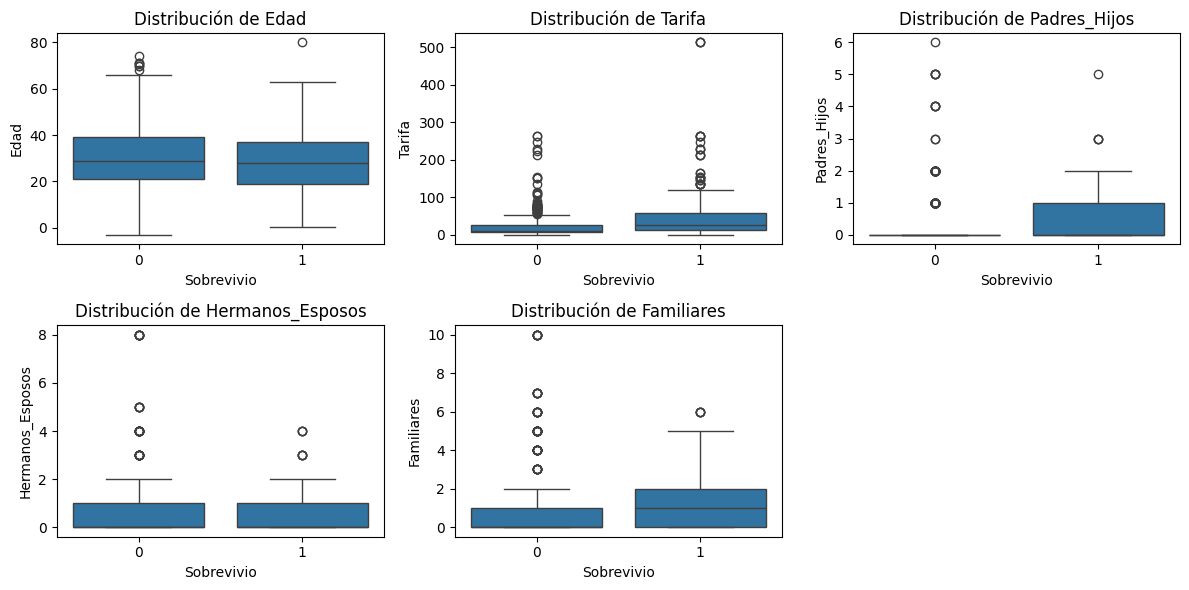

In [ ]:
# Definir las columnas a comparar y la configuración de la cuadrícula
columnas = ['Edad', 'Tarifa', 'Padres_Hijos', 'Hermanos_Esposos', 'Familiares']
n_cols = 3  # Número de columnas en la figura
n_rows = len(columnas) // n_cols + (len(columnas) % n_cols > 0)  # Calcula el número de filas necesario

# Crear la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 6))

# Si solo hay una fila o una columna, asegurar que 'axes' sea 2D
axes = axes.reshape(n_rows, n_cols)

# Dibujar un boxplot para cada columna en un subgráfico diferente
for i, columna in enumerate(columnas):
    row = i // n_cols
    col = i % n_cols
    sns.boxplot(x='Sobrevivio', y=columna, data=df_train, ax=axes[row, col])
    axes[row, col].set_title(f'Distribución de {columna}')

# Eliminar ejes vacíos si la cantidad de columnas no es múltiplo de n_cols
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

plt.show()


**Observaciones**


*   Edad: La edad no parece ser un factor determinante significativo en la supervivencia, ya que las medianas son similares.

*   Tarifa: Las tarifas más altas parecen estar asociadas con una mayor probabilidad de supervivencia.

*   Padres_Hijos y Familiares: Tener padres/hijos y un mayor número de familiares a bordo parece estar ligeramente asociado con una mayor probabilidad de supervivencia.

*   Hermanos_Esposos: No hay una diferencia significativa entre sobrevivientes y no sobrevivientes en términos del número de hermanos y esposos a bordo.


# **Visualización de datos**

 Se busca analizar la tasa de supervivencia en función de varias variables categóricas en los datos de entrenamiento, visualizándolas mediante gráficos de barras (barplots).

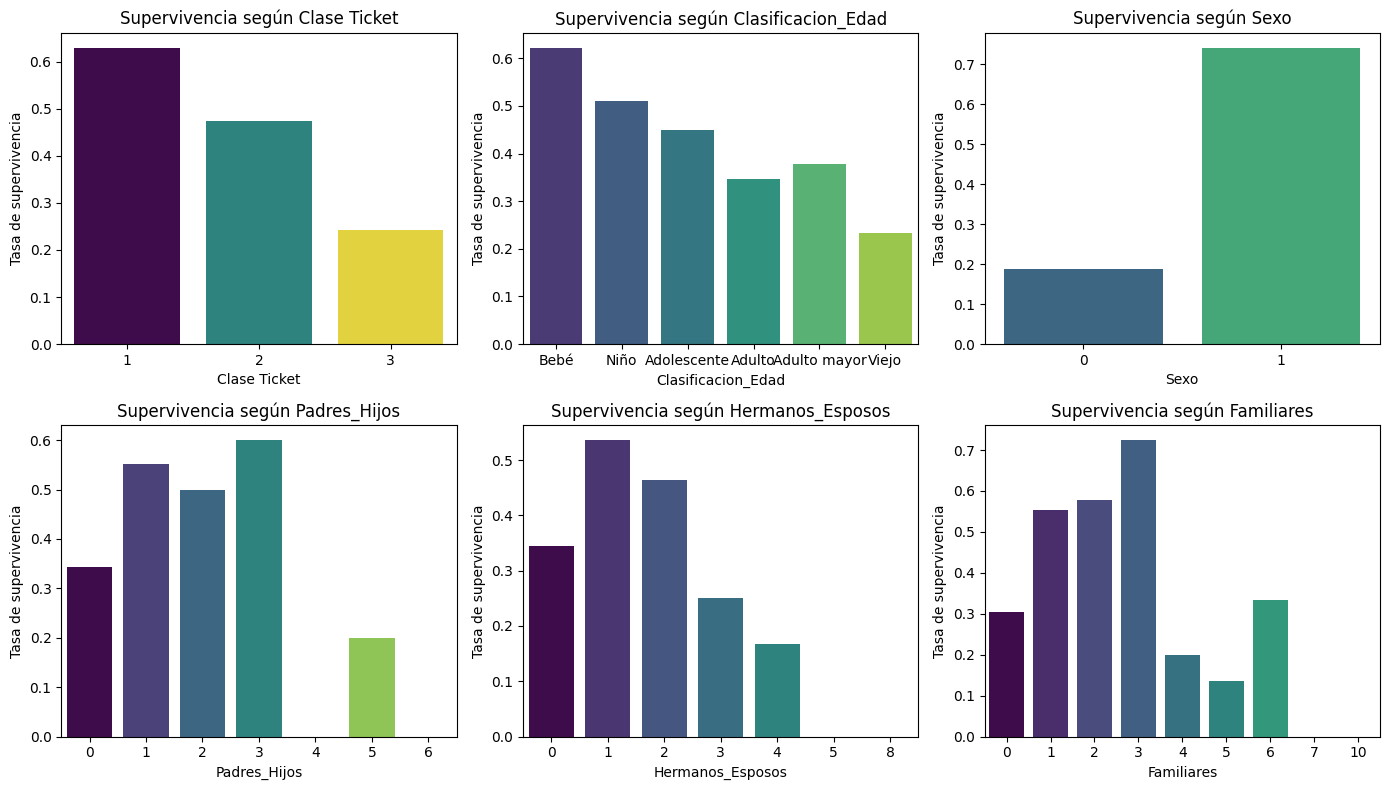

In [ ]:
# Definir las columnas categóricas a analizar y la configuración de la cuadrícula
columnas_categoricas = ['Clase Ticket', 'Clasificacion_Edad', 'Sexo', 'Padres_Hijos', 'Hermanos_Esposos', 'Familiares']
n_cols = 3  # Número de columnas en la figura
n_rows = len(columnas_categoricas) // n_cols + (len(columnas_categoricas) % n_cols > 0)  # Calcula el número de filas necesario

# Crear la figura y la cuadrícula de subgráficos
fig, axes = plt.subplots(n_rows, n_cols, figsize=(14, 8))

# Asegurarse de que axes es un array 2D
axes = axes.reshape(n_rows, n_cols)

# Dibujar un barplot para cada variable categórica en un subgráfico diferente
for i, columna in enumerate(columnas_categoricas):
    row = i // n_cols
    col = i % n_cols

    # Calcular la tasa de supervivencia para cada categoría
    sobrevivencia_por_categoria = df_train.groupby(columna, observed=False)['Sobrevivio'].mean()
    #print(f"Tasa de sobrevivencia por {columna}:")
    #print(sobrevivencia_por_categoria)
    #print("\n")

    # Crear el gráfico de barras
    sns.barplot(x=columna, y='Sobrevivio', data=df_train, errorbar=None, hue=columna, palette='viridis', legend=False, ax=axes[row, col])
    axes[row, col].set_title(f'Supervivencia según {columna}')
    axes[row, col].set_ylabel('Tasa de supervivencia')
    axes[row, col].set_xlabel(columna)

# Eliminar ejes vacíos si los hay
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ajustar el layout para que no se solapen los gráficos
plt.tight_layout()

plt.show()



**Observaciones**

*   Clase del Ticket: La clase del ticket es un factor importante, con los pasajeros de primera clase teniendo mayores tasas de supervivencia.

*   Clasificación de Edad: Los más jóvenes, especialmente los bebés, tienen mayores probabilidades de supervivencia.

*   Sexo: Las mujeres tienen una tasa de supervivencia significativamente mayor que los hombres.

*   Padres/Hijos y Hermanos/Esposos: Tener una cantidad moderada de familiares a bordo (ni demasiados ni ninguno) parece estar asociado con una mayor supervivencia.



Se crea un boxplot que muestre la distribución de la columna Tarifa según las diferentes categorías de la columna Clase Ticket de los datos de entrenamiento.

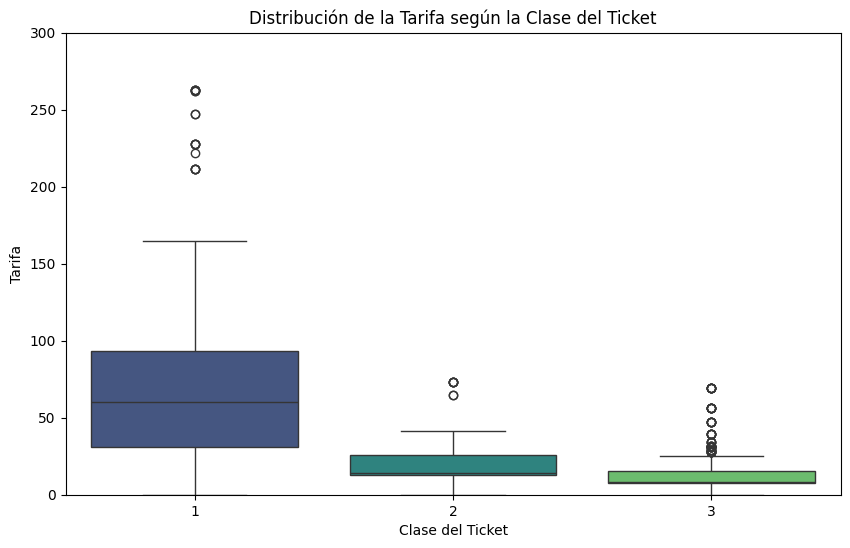

In [ ]:
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 6))

# Crear el boxplot
sns.boxplot(x='Clase Ticket', y='Tarifa', data=df_train, palette='viridis', ax=ax)

# Configurar etiquetas y título
ax.set_xlabel('Clase del Ticket')
ax.set_ylabel('Tarifa')
ax.set_title('Distribución de la Tarifa según la Clase del Ticket')

# Limitar el rango del eje y a un máximo de 300
ax.set_ylim(0, 300)

plt.show()


**Observaciones**

*   Primera Clase: Los pasajeros de primera clase pagaron significativamente más por sus tickets en comparación con los pasajeros de segunda y tercera clase. La distribución de las tarifas es amplia y presenta varios valores atípicos altos.

*   Segunda Clase: Las tarifas de segunda clase son más bajas y están más concentradas en un rango estrecho, con menos valores atípicos comparados con la primera clase.

*   Tercera Clase: Las tarifas de tercera clase son las más bajas y tienen una distribución estrecha similar a la de la segunda clase, pero con una mediana más baja y también con algunos valores atípicos.







# **Preprocesamiento de datos previo modelo**




# Entrenamiento del modelo

In [ ]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score, recall_score, precision_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()


# Lista de características (predictoras) seleccionadas para el modelo
predictoras = ['Clase Ticket', 'Sexo', 'Edad', 'Familiares']

# Selección y escalado de las características del DataFrame de entrenamiento
# Si no se desea escalar, se puede usar la línea comentada
X_train = scaler.fit_transform(df_train[predictoras])  # Escalados
# X_train = df_train[predictoras]                      # Sin escalar

# Selección de la variable objetivo de entrenamiento
y_train = df_train['Sobrevivio']


# Selección y escalado de las características del DataFrame de prueba (test)
# Si no se desea escalar, se puede usar la línea comentada
X_test = scaler.fit_transform(df_test[predictoras])  # Escalados
# X_test = df_test[predictoras]                      # Sin escalar

# Selección de la variable objetivo del DataFrame de prueba (test)
y_test = df_test['Sobrevivio']


In [ ]:
len(X_test)

418

Calcula e imprime la exactitud, recall, f1-score, precisión y el área bajo la curva ROC (ROC AUC) para los datos de prueba.


In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

def print_scores(fitted_model):
    res = {
        "Accuracy on train:": accuracy_score(fitted_model.predict(X_train), y_train),
        "Recall on train:": recall_score(fitted_model.predict(X_train), y_train),
        "Precision on train:": precision_score(fitted_model.predict(X_train), y_train),
        "F1-Score on train:": f1_score(fitted_model.predict(X_train), y_train),
        "ROC AUC on train:": roc_auc_score(y_train, fitted_model.predict_proba(X_train)[:, 1]),

        "Accuracy on test:": accuracy_score(fitted_model.predict(X_test), y_test),
        "Recall on test:": recall_score(fitted_model.predict(X_test), y_test),
        "Precision on test:": precision_score(fitted_model.predict(X_test), y_test),
        "F1-Score on test:": f1_score(fitted_model.predict(X_test), y_test),
        "ROC AUC on test:": roc_auc_score(y_test, fitted_model.predict_proba(X_test)[:, 1]),
    }

    # Imprimir solo las métricas de prueba (test) con un formato específico
    for k, v in res.items():
        #if 'on train' in k:  # Filtrar para incluir solo las claves que contienen 'on test'
            print(k, round(v, 3))
    print("-" * 30)  # Línea separadora para claridad en la salida



# **Resultados preliminares**

In [ ]:
# Regresión Logística
print('Regresión Logística')

# Modelo 1: Regresión Logística con C=0.01, solver='liblinear', max_iter=1000
model_1 = LogisticRegression(C=0.01, solver='liblinear', max_iter=1000)
model_1.fit(X_train, y_train)
print_scores(model_1)


# Modelo 2: Regresión Logística con C=1, solver='sag', max_iter=2000
model_2 = LogisticRegression(C=1, solver='sag', max_iter=2000)
model_2.fit(X_train, y_train)
print_scores(model_2)

# Modelo 3: Regresión Logística con C=10, solver='newton-cg', max_iter=3000
model_3 = LogisticRegression(C=10, solver='newton-cg', max_iter=3000)
model_3.fit(X_train, y_train)
print_scores(model_3)

# Modelo 4: Regresión Logística con C=0.05, solver='saga', max_iter=5000, penalty='l2'
model_4 = LogisticRegression(C=0.05, solver='saga', max_iter=5000, penalty='l2')
model_4.fit(X_train, y_train)
print_scores(model_4)

# Modelo 5: Regresión Logística con C=0.5, solver='lbfgs', max_iter=1000, penalty='l2'
model_5 = LogisticRegression(C=0.5, solver='lbfgs', max_iter=1000, penalty='l2')
model_5.fit(X_train, y_train)
print_scores(model_5)

print('')
print('Árboles de decisión')

# Árbol de decisión 1: max_depth=30, min_samples_split=2, criterion='gini'
tree_model_1 = DecisionTreeClassifier(max_depth=30, min_samples_split=2, criterion='gini')
tree_model_1.fit(X_train, y_train)
print_scores(tree_model_1)

# Árbol de decisión 2: max_depth=100, min_samples_split=10, criterion='entropy'
tree_model_2 = DecisionTreeClassifier(max_depth=100, min_samples_split=10, criterion='entropy')
tree_model_2.fit(X_train, y_train)
print_scores(tree_model_2)

# Árbol de decisión 3: max_depth=150, min_samples_split=5, criterion='gini'
tree_model_3 = DecisionTreeClassifier(max_depth=150, min_samples_split=5, criterion='gini')
tree_model_3.fit(X_train, y_train)
print_scores(tree_model_3)

print('')
print('Random Forest')

# Random Forest 1: n_estimators=50, max_features='sqrt', max_depth=50
rf_model_1 = RandomForestClassifier(n_estimators=50, max_features='sqrt', max_depth=50)
rf_model_1.fit(X_train, y_train)
print_scores(rf_model_1)

# Random Forest 2: n_estimators=100, max_features='log2', max_depth=100
rf_model_2 = RandomForestClassifier(n_estimators=100, max_features='log2', max_depth=100)
rf_model_2.fit(X_train, y_train)
print_scores(rf_model_2)

# Random Forest 3: n_estimators=200, max_features='sqrt', max_depth=200
rf_model_3 = RandomForestClassifier(n_estimators=200, max_features='sqrt', max_depth=200)
rf_model_3.fit(X_train, y_train)
print_scores(rf_model_3)

# Random Forest 4: n_estimators=150, max_features='sqrt', max_depth=250, min_samples_split=4
rf_model_4 = RandomForestClassifier(n_estimators=150, max_features='sqrt', max_depth=250, min_samples_split=4)
rf_model_4.fit(X_train, y_train)
print_scores(rf_model_4)

# Random Forest 5: n_estimators=300, max_features='log2', max_depth=300, min_samples_leaf=2
rf_model_5 = RandomForestClassifier(n_estimators=300, max_features='log2', max_depth=300, min_samples_leaf=2)
rf_model_5.fit(X_train, y_train)
print_scores(rf_model_5)

print('')
print('KNN')

# KNN 1: n_neighbors=3, weights='uniform'
knn_model_1 = KNeighborsClassifier(n_neighbors=3, weights='uniform')
knn_model_1.fit(X_train, y_train)
print_scores(knn_model_1)

# KNN 2: n_neighbors=7, weights='distance'
knn_model_2 = KNeighborsClassifier(n_neighbors=7, weights='distance')
knn_model_2.fit(X_train, y_train)
print_scores(knn_model_2)

# KNN 3: n_neighbors=15, weights='uniform'
knn_model_3 = KNeighborsClassifier(n_neighbors=15, weights='uniform')
knn_model_3.fit(X_train, y_train)
print_scores(knn_model_3)

print('')
print('Naive Bayes')

# Naive Bayes 1: var_smoothing=1e-9
nb_model_1 = GaussianNB(var_smoothing=1e-9)
nb_model_1.fit(X_train, y_train)
print_scores(nb_model_1)

# Naive Bayes 2: var_smoothing=1e-8
nb_model_2 = GaussianNB(var_smoothing=1e-8)
nb_model_2.fit(X_train, y_train)
print_scores(nb_model_2)

# Naive Bayes 3: var_smoothing=1e-10
nb_model_3 = GaussianNB(var_smoothing=1e-10)
nb_model_3.fit(X_train, y_train)
print_scores(nb_model_3)


Regresión Logística
Accuracy on train: 0.787
Recall on train: 0.947
Precision on train: 0.471
F1-Score on train: 0.629
ROC AUC on train: 0.847
Accuracy on test: 0.775
Recall on test: 0.9
Precision on test: 0.456
F1-Score on test: 0.605
ROC AUC on test: 0.803
------------------------------
Accuracy on train: 0.79
Recall on train: 0.754
Precision on train: 0.673
F1-Score on train: 0.711
ROC AUC on train: 0.853
Accuracy on test: 0.768
Recall on test: 0.71
Precision on test: 0.652
F1-Score on test: 0.68
ROC AUC on test: 0.807
------------------------------
Accuracy on train: 0.798
Recall on train: 0.756
Precision on train: 0.699
F1-Score on train: 0.726
ROC AUC on train: 0.853
Accuracy on test: 0.758
Recall on test: 0.694
Precision on test: 0.646
F1-Score on test: 0.669
ROC AUC on test: 0.808
------------------------------
Accuracy on train: 0.787
Recall on train: 0.742
Precision on train: 0.681
F1-Score on train: 0.71
ROC AUC on train: 0.85
Accuracy on test: 0.768
Recall on test: 0.702
Pr

# **GridSearchCV**

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
import warnings

# Ignorar todos los warnings
warnings.filterwarnings('ignore')

# Definir los modelos y sus respectivos hiperparámetros para la búsqueda
models = {
    'LogisticRegression': {
        'model': LogisticRegression(),
        'params': {
            'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'max_iter': [100, 200, 300, 400, 500],
            'penalty': ['l2', 'l1', 'elasticnet', 'none'],
            'l1_ratio': [0.0, 0.15, 0.5, 0.7, 1.0]  # Solo aplicable con 'elasticnet'
        }
    },
    'DecisionTree': {
        'model': DecisionTreeClassifier(),
        'params': {
            'criterion': ['gini', 'entropy', 'log_loss'],
            'splitter': ['best', 'random'],
            'max_depth': [None, 10, 20, 30, 50],
            'min_samples_split': [2, 5, 10, 20],
            'min_samples_leaf': [1, 2, 4, 8],
            'max_features': [None, 'auto', 'sqrt', 'log2'],
            'class_weight': [None, 'balanced']
        }
    },
    'RandomForest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [10, 50, 100],
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20, 30],
            'min_samples_split': [2, 5, 10]
        }
    },
    'NaiveBayes': {
        'model': GaussianNB(),
        'params': {
            'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
        }
    },
    'KNN': {
        'model': KNeighborsClassifier(),
        'params': {
            'n_neighbors': [3, 5, 7, 9, 11, 15, 19],
            'weights': ['uniform', 'distance'],
            'metric': ['euclidean', 'manhattan', 'minkowski', 'chebyshev'],
            'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
            'leaf_size': [10, 20, 30, 40, 50],
            'p': [1, 2]
        }
    }
}

# Ejecutar GridSearchCV para cada modelo
best_models = {}
for model_name, config in models.items():
    print(f"Buscando mejores parámetros para {model_name}...")
    grid = GridSearchCV(config['model'], config['params'], cv=5, n_jobs=-1, scoring='accuracy')
    grid.fit(X_train, y_train)
    best_models[model_name] = grid.best_estimator_
    print(f"Mejor accuracy para {model_name}: {grid.best_score_:.4f}")
    print(f"Mejores parámetros: {grid.best_params_}")
    print("-" * 50)

# Evaluar el mejor modelo de cada tipo en el conjunto de prueba
for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy en prueba para {model_name}: {accuracy:.4f}")

Buscando mejores parámetros para LogisticRegression...
Mejor accuracy para LogisticRegression: 0.7901
Mejores parámetros: {'C': 1, 'l1_ratio': 0.0, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}
--------------------------------------------------
Buscando mejores parámetros para DecisionTree...
Mejor accuracy para DecisionTree: 0.8249
Mejores parámetros: {'class_weight': None, 'criterion': 'gini', 'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 8, 'min_samples_split': 5, 'splitter': 'best'}
--------------------------------------------------
Buscando mejores parámetros para RandomForest...
Mejor accuracy para RandomForest: 0.8283
Mejores parámetros: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}
--------------------------------------------------
Buscando mejores parámetros para NaiveBayes...
Mejor accuracy para NaiveBayes: 0.7857
Mejores parámetros: {'var_smoothing': 1e-09}
--------------------------------------------------
Buscan

# **Optuna**

In [ ]:
pip install optuna

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 362.8/362.8 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.0/233.0 kB 13.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.6/78.6 kB 5.4 MB/s eta 0:00:00


In [ ]:
import optuna
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def objective(trial):

    try:

        # Seleccionar el modelo
        model_name = trial.suggest_categorical('model', [
            'LogisticRegression',
            'DecisionTreeClassifier',
            'RandomForestClassifier',
            'KNeighborsClassifier',
            'GaussianNB'
        ])

        if model_name == 'LogisticRegression':
          model = LogisticRegression(
              C=trial.suggest_loguniform('C', 1e-4, 1e2),
              solver=trial.suggest_categorical('solver', ['newton-cg', 'lbfgs', 'liblinear']),
              max_iter=trial.suggest_int('max_iter', 50, 300),
              penalty=trial.suggest_categorical('penalty', ['l2', 'none']),
              multi_class=trial.suggest_categorical('multi_class', ['auto', 'ovr', 'multinomial'])
          )

        elif model_name == 'DecisionTreeClassifier':
            model = DecisionTreeClassifier(
                criterion=trial.suggest_categorical('criterion', ['gini', 'entropy']),
                max_depth=trial.suggest_int('max_depth', 1, 20),
                min_samples_split=trial.suggest_int('min_samples_split', 2, 20),
                min_samples_leaf=trial.suggest_int('min_samples_leaf', 1, 20),
                max_leaf_nodes=trial.suggest_int('max_leaf_nodes', 5, 30)
            )

        elif model_name == 'RandomForestClassifier':
            model = RandomForestClassifier(
                n_estimators=trial.suggest_int('n_estimators', 10, 100),
                max_depth=trial.suggest_int('max_depth', 2, 32),
                min_samples_split=trial.suggest_int('min_samples_split', 2, 16),
                bootstrap=trial.suggest_categorical('bootstrap', [True, False]),
                max_features=trial.suggest_categorical('max_features', ['auto', 'sqrt', 'log2']),
                oob_score=trial.suggest_categorical('oob_score', [True, False])
            )

        elif model_name == 'KNeighborsClassifier':
            model = KNeighborsClassifier(
                n_neighbors=trial.suggest_int('n_neighbors', 1, 20),
                weights=trial.suggest_categorical('weights', ['uniform', 'distance']),
                p=trial.suggest_int('p', 1, 2),
                algorithm=trial.suggest_categorical('algorithm', ['auto', 'ball_tree', 'kd_tree', 'brute']),
                leaf_size=trial.suggest_int('leaf_size', 20, 60)
            )

        elif model_name == 'GaussianNB':
            model = GaussianNB(var_smoothing=trial.suggest_loguniform('var_smoothing', 1e-9, 1e-3))

        # Entrenar el modelo
        model.fit(X_train, y_train)

        # Evaluar el modelo
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        return accuracy

    except Exception as e:
        # Imprimir el error y retornar una baja precisión en caso de fallo
        print(f"Error en el ensayo: {e}")
        return 0.0

In [ ]:
study = optuna.create_study(direction='maximize')  # Maximizar la precisión
study.optimize(objective, n_trials=5000)  # Realizar 100 ensayos

# Mejor resultado
print(f"Best trial: {study.best_trial.value}")
print(f"Best params: {study.best_trial.params}")

[I 2024-09-10 11:28:39,123] A new study created in memory with name: no-name-3ef70abc-3cd8-48ce-8c19-0fa9a401ded5
[I 2024-09-10 11:28:39,845] Trial 0 finished with value: 0.7535885167464115 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 70, 'max_depth': 9, 'min_samples_split': 3, 'bootstrap': True, 'max_features': 'sqrt', 'oob_score': True}. Best is trial 0 with value: 0.7535885167464115.
[I 2024-09-10 11:28:39,862] Trial 1 finished with value: 0.7344497607655502 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 10, 'min_samples_leaf': 16, 'max_leaf_nodes': 30}. Best is trial 0 with value: 0.7535885167464115.
[I 2024-09-10 11:28:40,144] Trial 2 finished with value: 0.7392344497607656 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 41, 'max_depth': 22, 'min_samples_split': 13, 'bootstrap': False, 'max_features': 'log2', 'oob_score': False}. Best is trial 0 with value: 0.75358851674641

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:28:41,273] Trial 26 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.006649432263185e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:41,299] Trial 27 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.033540305581804e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:41,322] Trial 28 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.88638136688962e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:41,369] Trial 29 finished with value: 0.0 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 14, 'max_depth': 32, 'min_samples_split': 2, 'bootstrap': True, 'max_features': 'auto', 'oob_score': True}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:41,461] Trial 30 finished with value: 0.7607655502392344 and parameters: {'mo

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:28:41,632] Trial 34 finished with value: 0.7655502392344498 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 19, 'min_samples_leaf': 20, 'max_leaf_nodes': 10}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:41,725] Trial 35 finished with value: 0.0 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 100, 'max_depth': 23, 'min_samples_split': 5, 'bootstrap': False, 'max_features': 'sqrt', 'oob_score': True}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:41,774] Trial 36 finished with value: 0.6220095693779905 and parameters: {'model': 'LogisticRegression', 'C': 0.00017700940107375377, 'solver': 'newton-cg', 'max_iter': 255, 'penalty': 'l2', 'multi_class': 'ovr'}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:41,849] Trial 37 finished with value: 0.7631578947368421 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'g

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:28:42,015] Trial 40 finished with value: 0.0 and parameters: {'model': 'LogisticRegression', 'C': 90.59065257006083, 'solver': 'liblinear', 'max_iter': 186, 'penalty': 'none', 'multi_class': 'auto'}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:42,040] Trial 41 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.9325998506202743e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:42,090] Trial 42 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.680508989443773e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:42,114] Trial 43 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.3141870253240194e-08}. Best is trial 4 with value: 0.7799043062200957.


Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:28:42,221] Trial 44 finished with value: 0.0 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 40, 'max_depth': 32, 'min_samples_split': 14, 'bootstrap': True, 'max_features': 'auto', 'oob_score': False}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:42,267] Trial 45 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.438292291230221e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:42,396] Trial 46 finished with value: 0.7440191387559809 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 2, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 37}. Best is trial 4 with value: 0.7799043062200957.


Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:28:42,426] Trial 47 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.315829622177594e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:42,453] Trial 48 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3546053077417529e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:42,480] Trial 49 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.136160576754633e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:42,534] Trial 50 finished with value: 0.7655502392344498 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 5, 'min_samples_split': 17, 'min_samples_leaf': 9, 'max_leaf_nodes': 17}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:42,564] Trial 51 finished with value: 0.7799043062200957 and parameters: 

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:28:45,501] Trial 99 finished with value: 0.7416267942583732 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 16, 'min_samples_leaf': 14, 'max_leaf_nodes': 22}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:45,592] Trial 100 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.458766868897682e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:45,657] Trial 101 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.485464736112112e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:45,693] Trial 102 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.600025633538517e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:45,721] Trial 103 finished with value: 0.7799043062200957 and parameters

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:28:46,616] Trial 119 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.425746201055738e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:46,734] Trial 120 finished with value: 0.7751196172248804 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 16, 'min_samples_leaf': 20, 'max_leaf_nodes': 5}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:46,785] Trial 121 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.260757712093557e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:46,816] Trial 122 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.1736700548394265e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:46,842] Trial 123 finished with value: 0.7799043062200957 and paramet

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:28:49,024] Trial 160 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.1230614059937826e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:49,052] Trial 161 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.890323575430762e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:49,086] Trial 162 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.70329661632067e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:49,110] Trial 163 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.8339326866337957e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:49,135] Trial 164 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.237811609459413e-06}. Best is tria

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:28:49,424] Trial 173 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.2233220305652793e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:49,454] Trial 174 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.2896467861835778e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:49,511] Trial 175 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0436387787025178e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:49,540] Trial 176 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.6167772095892234e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:49,575] Trial 177 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.097618983754815e-07}. Best is t

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:28:53,259] Trial 223 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.599555096731425e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:53,326] Trial 224 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.1452372731008922e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:53,666] Trial 225 finished with value: 0.7535885167464115 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 5, 'weights': 'uniform', 'p': 1, 'algorithm': 'kd_tree', 'leaf_size': 60}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:53,733] Trial 226 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.17549900653245e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:53,857] Trial 227 finished with value: 0.7799043062200957 and parameters: {'model': 'Gaussian

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:28:55,106] Trial 238 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.849949466034559e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:55,155] Trial 239 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0007493465720700755}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:55,220] Trial 240 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.334231790555569e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:55,268] Trial 241 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.523289732829695e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:55,311] Trial 242 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.4849093551170787e-08}. Best is tria

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:28:59,038] Trial 298 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.247154748810438e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:59,119] Trial 299 finished with value: 0.7727272727272727 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 9, 'min_samples_split': 18, 'min_samples_leaf': 4, 'max_leaf_nodes': 27}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:59,164] Trial 300 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.410464471448652e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:59,228] Trial 301 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.619725588308614e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:59,255] Trial 302 finished with value: 0.7799043062200957 and paramete

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:28:59,731] Trial 310 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.561625485822758e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:59,938] Trial 311 finished with value: 0.7248803827751196 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 3, 'weights': 'uniform', 'p': 1, 'algorithm': 'ball_tree', 'leaf_size': 25}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:28:59,989] Trial 312 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.2077586749585304e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:00,035] Trial 313 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2059389986345737e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:00,060] Trial 314 finished with value: 0.7799043062200957 and parameters: {'model': 'Gaus

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:29:00,484] Trial 322 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.183498686341992e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:00,518] Trial 323 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3198676567813473e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:00,554] Trial 324 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.924947869373085e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:00,650] Trial 325 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0009580937993398214}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:00,703] Trial 326 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.006471604112704e-08}. Best is tria

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:29:03,538] Trial 374 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.959021278371104e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:03,587] Trial 375 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.098786339079194e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:03,707] Trial 376 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.1542527030942723e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:03,828] Trial 377 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.93750338342057e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:03,926] Trial 378 finished with value: 0.7703349282296651 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 8, 'min_

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:29:04,821] Trial 390 finished with value: 0.7679425837320574 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 17, 'weights': 'uniform', 'p': 2, 'algorithm': 'auto', 'leaf_size': 34}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:04,883] Trial 391 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.2557870362483353e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:04,975] Trial 392 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3777060281010063e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:05,102] Trial 393 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.5860227798378367e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:05,173] Trial 394 finished with value: 0.7799043062200957 and parameters: {'model': 'Gaussia

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:05,560] Trial 402 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2621326006428108e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:05,688] Trial 403 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.180732461800288e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:05,745] Trial 404 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.825116381234758e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:05,795] Trial 405 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.7509766173219914e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:05,878] Trial 406 finished with value: 0.777511961722488 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 13, 

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:10,290] Trial 450 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.222965158110883e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:10,455] Trial 451 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00016734628006012436}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:10,579] Trial 452 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.949534599103588e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:10,707] Trial 453 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.6763058745653153e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:10,834] Trial 454 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.6331333457909468e-05}. Best is tr

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:29:13,511] Trial 478 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.697889092396617e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:13,611] Trial 479 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.7756010634211265e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:13,668] Trial 480 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.83789870839474e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:13,740] Trial 481 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.4307113105536962e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:13,858] Trial 482 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.501853286086941e-09}. Best is tria

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:21,357] Trial 554 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.1773662867756956e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:21,422] Trial 555 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.8874156174977478e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:21,502] Trial 556 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.698328934713509e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:21,595] Trial 557 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.4779185077679194e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:21,646] Trial 558 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.7689597093577235e-05}. Best is t

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:30,373] Trial 665 finished with value: 0.7751196172248804 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 15, 'min_samples_split': 15, 'min_samples_leaf': 11, 'max_leaf_nodes': 5}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:30,397] Trial 666 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.2886727827273416e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:30,422] Trial 667 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.973189555175123e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:30,447] Trial 668 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.120964727824535e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:30,473] Trial 669 finished with value: 0.7799043062200957 and parame

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:29:31,166] Trial 684 finished with value: 0.7655502392344498 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 62, 'max_depth': 6, 'min_samples_split': 7, 'bootstrap': False, 'max_features': 'log2', 'oob_score': False}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:31,190] Trial 685 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.050594320724349e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:31,213] Trial 686 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.305164990805899e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:31,236] Trial 687 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.470879682576073e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:31,262] Trial 688 finished with value: 0.779904306220095

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:29:32,833] Trial 731 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00014817470017880298}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:32,868] Trial 732 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.515057969679925e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:32,900] Trial 733 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.369265249117804e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:32,934] Trial 734 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.322873875616276e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:33,005] Trial 735 finished with value: 0.0 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 48, 'max_depth': 24, 'min_samples_split'

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:33,229] Trial 743 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.4331969913558069e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:33,288] Trial 744 finished with value: 0.777511961722488 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 3, 'min_samples_split': 6, 'min_samples_leaf': 3, 'max_leaf_nodes': 7}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:33,313] Trial 745 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.640498821971054e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:33,341] Trial 746 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.805216451145503e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:33,367] Trial 747 finished with value: 0.7799043062200957 and parameters

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:29:35,247] Trial 795 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.252480692798803e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:35,271] Trial 796 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.578238473196839e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:35,324] Trial 797 finished with value: 0.7535885167464115 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 14, 'max_leaf_nodes': 18}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:35,351] Trial 798 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.906116787843793e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:35,377] Trial 799 finished with value: 0.7799043062200957 and parame

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:29:35,739] Trial 808 finished with value: 0.7535885167464115 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 13, 'weights': 'uniform', 'p': 1, 'algorithm': 'auto', 'leaf_size': 49}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:35,770] Trial 809 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.923535428386437e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:35,800] Trial 810 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.734266593646203e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:35,833] Trial 811 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.063027330384302e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:35,873] Trial 812 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:36,164] Trial 820 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.147373443492787e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:36,188] Trial 821 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.4695297597054327e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:36,213] Trial 822 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.752778770132244e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:36,284] Trial 823 finished with value: 0.7344497607655502 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 9, 'min_samples_leaf': 10, 'max_leaf_nodes': 21}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:36,313] Trial 824 finished with value: 0.7799043062200957 and parameters

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:39,165] Trial 899 finished with value: 0.7631578947368421 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 4, 'min_samples_split': 7, 'min_samples_leaf': 1, 'max_leaf_nodes': 30}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:39,199] Trial 900 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.5520516412354825e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:39,238] Trial 901 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.1934406390520637e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:39,264] Trial 902 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00020387596923811344}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:39,293] Trial 903 finished with value: 0.7799043062200957 and parame

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:29:39,627] Trial 912 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.7523567555443165e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:39,664] Trial 913 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.267983837476997e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:39,715] Trial 914 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.462338921915933e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:39,751] Trial 915 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.8365220936649106e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:39,786] Trial 916 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.6703855104304264e-06}. Best is tr

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:29:42,476] Trial 964 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.323254449206793e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:42,514] Trial 965 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.253421520697851e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:42,564] Trial 966 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.7997462729910795e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:42,615] Trial 967 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.470200243647363e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:42,667] Trial 968 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0581110835470636e-05}. Best is tri

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:43,012] Trial 974 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2221835285521317e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:43,055] Trial 975 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.7767309924266865e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:43,107] Trial 976 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.24931354560105e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:43,206] Trial 977 finished with value: 0.7440191387559809 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 8, 'min_samples_leaf': 16, 'max_leaf_nodes': 13}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:43,245] Trial 978 finished with value: 0.7799043062200957 and parameter

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:29:46,994] Trial 1042 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0473789037628399e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:47,026] Trial 1043 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00023098700858992623}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:47,058] Trial 1044 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.4271861857929918e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:47,092] Trial 1045 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.8936362768723565e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:47,122] Trial 1046 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.454223158356626e-06}. Best

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:47,412] Trial 1054 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3762413606387977e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:47,450] Trial 1055 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.41121845995853e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:47,483] Trial 1056 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.718514531035666e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:47,516] Trial 1057 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.5953155661490406e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:47,593] Trial 1058 finished with value: 0.7655502392344498 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth':

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:29:49,311] Trial 1095 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.1135876147135568e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:49,342] Trial 1096 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.537458148292797e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:49,377] Trial 1097 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.7281759264649753e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:49,414] Trial 1098 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.831012134094311e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:49,780] Trial 1099 finished with value: 0.7440191387559809 and parameters: {'model': 'RandomForestClassifier', 'n_estimators': 86, 'max_depth': 9,

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:51,035] Trial 1130 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.6102411707061535e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:51,069] Trial 1131 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.493608705858465e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:51,104] Trial 1132 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.587350480291378e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:51,174] Trial 1133 finished with value: 0.7392344497607656 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 11, 'min_samples_split': 16, 'min_samples_leaf': 18, 'max_leaf_nodes': 29}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:51,205] Trial 1134 finished with value: 0.7799043062200957 and par

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:29:52,992] Trial 1172 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.738350189134387e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:53,026] Trial 1173 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.4892457484056967e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:53,057] Trial 1174 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.86874711014118e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:53,092] Trial 1175 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.949537629891993e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:53,123] Trial 1176 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0001475301908901254}. Best is 

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:54,593] Trial 1208 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.297484190698981e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:54,648] Trial 1209 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.378878227628009e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:54,702] Trial 1210 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.927164247001449e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:54,804] Trial 1211 finished with value: 0.7631578947368421 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 7, 'min_samples_split': 20, 'min_samples_leaf': 8, 'max_leaf_nodes': 21}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:54,848] Trial 1212 finished with value: 0.7799043062200957 and par

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:29:58,272] Trial 1274 finished with value: 0.7583732057416268 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 7, 'weights': 'uniform', 'p': 2, 'algorithm': 'brute', 'leaf_size': 50}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:58,311] Trial 1275 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2023088468262855e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:58,352] Trial 1276 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.7499761926706557e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:58,397] Trial 1277 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.6752415258357025e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:58,442] Trial 1278 finished with value: 0.7799043062200957 and parameters: {'model': 'Ga

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:29:58,811] Trial 1284 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.285820593942878e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:58,861] Trial 1285 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0823517459706006e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:58,906] Trial 1286 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0067940690652075e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:58,948] Trial 1287 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.5446219091587267e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:29:59,046] Trial 1288 finished with value: 0.7655502392344498 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:30:03,659] Trial 1351 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.476571037362061e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:03,707] Trial 1352 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.7219906345606974e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:03,762] Trial 1353 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.0534954162574046e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:03,954] Trial 1354 finished with value: 0.7488038277511961 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 10, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 34}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:04,051] Trial 1355 finished with value: 0.7799043062200957 and parameters: {'model': '

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:30:04,565] Trial 1364 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.6093579166885913e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:04,616] Trial 1365 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2272114186338007e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:04,712] Trial 1366 finished with value: 0.7751196172248804 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 6, 'min_samples_split': 19, 'min_samples_leaf': 3, 'max_leaf_nodes': 5}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:04,768] Trial 1367 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.267987981232654e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:04,806] Trial 1368 finished with value: 0.7799043062200957 and pa

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:30:07,952] Trial 1430 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.302708597877851e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:07,990] Trial 1431 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.0202555662472398e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:08,036] Trial 1432 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.187527583887256e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:08,072] Trial 1433 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.5184241814794494e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:08,106] Trial 1434 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.5110709239779487e-06}. Best 

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:30:08,458] Trial 1442 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.5153872067985e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:08,495] Trial 1443 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.1305229421006838e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:08,576] Trial 1444 finished with value: 0.7535885167464115 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 20, 'min_samples_leaf': 19, 'max_leaf_nodes': 11}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:08,619] Trial 1445 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.798562390301943e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:08,671] Trial 1446 finished with value: 0.7799043062200957 and param

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:30:11,947] Trial 1508 finished with value: 0.7440191387559809 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 7, 'weights': 'uniform', 'p': 2, 'algorithm': 'auto', 'leaf_size': 42}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:11,981] Trial 1509 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.547479306068785e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:12,016] Trial 1510 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0008077727418533e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:12,052] Trial 1511 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.054025478106186e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:12,106] Trial 1512 finished with value: 0.7799043062200957 and parameters: {'model': 'Gauss

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:30:12,524] Trial 1518 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0005285114921419755}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:12,590] Trial 1519 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.079161837859034e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:12,654] Trial 1520 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.1537462223458928e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:12,706] Trial 1521 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.8862605369144334e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:12,842] Trial 1522 finished with value: 0.7679425837320574 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth'

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:30:16,413] Trial 1574 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.7923118926104446e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:16,474] Trial 1575 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00013338276570482507}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:16,527] Trial 1576 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.290640338713254e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:16,598] Trial 1577 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.09123470810329e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:16,672] Trial 1578 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3949975812586843e-06}. Best i

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:30:17,197] Trial 1585 finished with value: 0.7488038277511961 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 13, 'weights': 'distance', 'p': 2, 'algorithm': 'brute', 'leaf_size': 55}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:17,258] Trial 1586 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.526557908257179e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:17,315] Trial 1587 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2538007895077717e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:17,361] Trial 1588 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.175451482125755e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:17,408] Trial 1589 finished with value: 0.7799043062200957 and parameters: {'model': 'Ga

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:30:17,861] Trial 1597 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.674342120194937e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:17,908] Trial 1598 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.092091470994009e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:17,956] Trial 1599 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.615863638355369e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:18,079] Trial 1600 finished with value: 0.7392344497607656 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 12, 'min_samples_split': 18, 'min_samples_leaf': 15, 'max_leaf_nodes': 30}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:18,130] Trial 1601 finished with value: 0.7799043062200957 and para

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:30:19,267] Trial 1623 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.3394099226716423e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:19,303] Trial 1624 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.240203154116026e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:19,341] Trial 1625 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.183636224737725e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:19,392] Trial 1626 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.928017267284636e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:19,477] Trial 1627 finished with value: 0.7655502392344498 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth':

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:30:21,488] Trial 1663 finished with value: 0.7607655502392344 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 8, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 35}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:21,531] Trial 1664 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.938906790001112e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:21,585] Trial 1665 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.6677232471977543e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:21,634] Trial 1666 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2092842932851698e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:21,679] Trial 1667 finished with value: 0.7799043062200957 and parameters: {'model': 'G

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:30:22,097] Trial 1676 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.1896010272837914e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:22,178] Trial 1677 finished with value: 0.7607655502392344 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 11, 'min_samples_split': 17, 'min_samples_leaf': 12, 'max_leaf_nodes': 27}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:22,226] Trial 1678 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.048162779448703e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:22,265] Trial 1679 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.060725014384564e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:22,305] Trial 1680 finished with value: 0.7799043062200957 and 

Error en el ensayo: Out of bag estimation only available if bootstrap=True


[I 2024-09-10 11:30:24,785] Trial 1725 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.3010186285552335e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:24,835] Trial 1726 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.0289416086724585e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:24,886] Trial 1727 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3755864017004163e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:24,934] Trial 1728 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.7877989043660477e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:25,022] Trial 1729 finished with value: 0.7679425837320574 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_dept

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:30:25,671] Trial 1742 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.968017534634417e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:25,718] Trial 1743 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.066045260804942e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:25,763] Trial 1744 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.136011291886356e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:25,811] Trial 1745 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2082380601482306e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:25,849] Trial 1746 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.3745809476517214e-06}. Best i

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:30:26,172] Trial 1753 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.1795892191278309e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:26,212] Trial 1754 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.383136598810503e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:26,253] Trial 1755 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.645257350761092e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:26,344] Trial 1756 finished with value: 0.7703349282296651 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 4, 'min_samples_split': 14, 'min_samples_leaf': 8, 'max_leaf_nodes': 21}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:26,394] Trial 1757 finished with value: 0.7799043062200957 and param

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:30:32,190] Trial 1818 finished with value: 0.7679425837320574 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 4, 'weights': 'uniform', 'p': 2, 'algorithm': 'auto', 'leaf_size': 50}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:32,330] Trial 1819 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.055054940919372e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:32,512] Trial 1820 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.724762834689693e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:32,759] Trial 1821 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.0910570299059047e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:32,936] Trial 1822 finished with value: 0.7799043062200957 and parameters: {'model': 'Gauss

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:30:33,906] Trial 1826 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.5961213237154457e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:34,115] Trial 1827 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.3953518095550136e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:34,264] Trial 1828 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.9804248693711927e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:34,357] Trial 1829 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.0261067080027712e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:34,432] Trial 1830 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.158376195964306e-07}. Best

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:30:44,274] Trial 1896 finished with value: 0.7464114832535885 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 13, 'weights': 'distance', 'p': 1, 'algorithm': 'brute', 'leaf_size': 27}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:44,323] Trial 1897 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.111276421849503e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:44,366] Trial 1898 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.486552169716386e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:44,410] Trial 1899 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3604353406336119e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:44,456] Trial 1900 finished with value: 0.7799043062200957 and parameters: {'model': 'Ga

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:30:44,972] Trial 1909 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2358009930145836e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:45,064] Trial 1910 finished with value: 0.7655502392344498 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 1, 'min_samples_split': 12, 'min_samples_leaf': 16, 'max_leaf_nodes': 8}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:45,107] Trial 1911 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.816475658332086e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:45,170] Trial 1912 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.8004293068092404e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:45,233] Trial 1913 finished with value: 0.7799043062200957 and para

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:30:50,230] Trial 1974 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.7479640339044203e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:50,387] Trial 1975 finished with value: 0.7440191387559809 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 2, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 41}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:50,446] Trial 1976 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.190668030322386e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:50,519] Trial 1977 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3903262751959676e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:50,595] Trial 1978 finished with value: 0.7799043062200957 and parameters: {'model': 'G

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:30:51,001] Trial 1985 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2970289974969093e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:51,048] Trial 1986 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3414314073424713e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:51,109] Trial 1987 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.7381853074788347e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:51,199] Trial 1988 finished with value: 0.7751196172248804 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 18, 'min_samples_leaf': 19, 'max_leaf_nodes': 26}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:51,242] Trial 1989 finished with value: 0.7799043062200957 and

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:30:54,966] Trial 2052 finished with value: 0.7535885167464115 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 18, 'weights': 'distance', 'p': 1, 'algorithm': 'ball_tree', 'leaf_size': 54}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:55,011] Trial 2053 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.2492542286521173e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:55,060] Trial 2054 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.054383740952129e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:55,102] Trial 2055 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0242648697652128e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:55,147] Trial 2056 finished with value: 0.7799043062200957 and parameters: {'model'

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:30:55,646] Trial 2065 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.536121883444221e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:55,766] Trial 2066 finished with value: 0.7727272727272727 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 7, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_leaf_nodes': 10}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:55,815] Trial 2067 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.324334314521034e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:55,862] Trial 2068 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.3204538456595443e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:55,907] Trial 2069 finished with value: 0.7799043062200957 and param

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:30:59,511] Trial 2129 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.362355680476858e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:59,651] Trial 2130 finished with value: 0.7607655502392344 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 20, 'weights': 'uniform', 'p': 2, 'algorithm': 'auto', 'leaf_size': 51}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:59,700] Trial 2131 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.114371666003647e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:59,756] Trial 2132 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0008178293298363634}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:30:59,802] Trial 2133 finished with value: 0.7799043062200957 and parameters: {'model': 'Gauss

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:31:00,268] Trial 2142 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.8667587084330524e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:00,358] Trial 2143 finished with value: 0.7535885167464115 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 14, 'min_samples_leaf': 10, 'max_leaf_nodes': 24}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:00,424] Trial 2144 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.0526292961524918e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:00,472] Trial 2145 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.5656821699337584e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:00,516] Trial 2146 finished with value: 0.7799043062200957 an

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:31:05,681] Trial 2207 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2659591229115358e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:05,835] Trial 2208 finished with value: 0.7488038277511961 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 12, 'weights': 'distance', 'p': 1, 'algorithm': 'brute', 'leaf_size': 42}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:05,903] Trial 2209 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.6623571628252705e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:05,967] Trial 2210 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.4367128545220066e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:06,034] Trial 2211 finished with value: 0.7799043062200957 and parameters: {'model': '

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:31:06,509] Trial 2216 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.257362441119312e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:06,573] Trial 2217 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.259729348109564e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:06,630] Trial 2218 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.8979316366094425e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:06,694] Trial 2219 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.383332377731769e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:06,761] Trial 2220 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.572075982929112e-05}. Best is

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:31:11,118] Trial 2284 finished with value: 0.7583732057416268 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 15, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 57}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:11,164] Trial 2285 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.6665531780785094e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:11,219] Trial 2286 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.0324833219178035e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:11,266] Trial 2287 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.703698536517989e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:11,312] Trial 2288 finished with value: 0.7799043062200957 and parameters: {'model': '

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:31:11,842] Trial 2296 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.935682037575371e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:11,896] Trial 2297 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.5991186340584795e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:11,944] Trial 2298 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.6836085083985607e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:11,992] Trial 2299 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.713463694182328e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:12,098] Trial 2300 finished with value: 0.7655502392344498 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth'

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:31:16,092] Trial 2362 finished with value: 0.7583732057416268 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 19, 'weights': 'distance', 'p': 1, 'algorithm': 'ball_tree', 'leaf_size': 21}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:16,147] Trial 2363 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.668378625474934e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:16,208] Trial 2364 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.755896389014205e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:16,258] Trial 2365 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.287880190181239e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:16,310] Trial 2366 finished with value: 0.7799043062200957 and parameters: {'model': 

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:31:16,749] Trial 2372 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.011465027310295e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:16,819] Trial 2373 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.3303359645285817e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:16,892] Trial 2374 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0678183905247115e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:16,967] Trial 2375 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.962714095074613e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:17,129] Trial 2376 finished with value: 0.7703349282296651 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 3

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:31:22,839] Trial 2439 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.186987345878956e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:23,030] Trial 2440 finished with value: 0.7655502392344498 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 13, 'weights': 'uniform', 'p': 2, 'algorithm': 'auto', 'leaf_size': 56}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:23,104] Trial 2441 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.7492776119310958e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:23,153] Trial 2442 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.852580362571072e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:23,202] Trial 2443 finished with value: 0.7799043062200957 and parameters: {'model': 'Gaus

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:31:23,761] Trial 2452 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.8834179962902002e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:23,811] Trial 2453 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00015794615244032025}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:23,915] Trial 2454 finished with value: 0.7751196172248804 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 9, 'min_samples_leaf': 5, 'max_leaf_nodes': 11}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:23,963] Trial 2455 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.4492099708355667e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:24,013] Trial 2456 finished with value: 0.7799043062200957 and 

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:31:28,139] Trial 2517 finished with value: 0.7440191387559809 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 11, 'weights': 'distance', 'p': 1, 'algorithm': 'brute', 'leaf_size': 59}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:28,193] Trial 2518 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.873345076189308e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:28,242] Trial 2519 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.9786111553915554e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:28,292] Trial 2520 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.667256450390745e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:28,343] Trial 2521 finished with value: 0.7799043062200957 and parameters: {'model': 'Ga

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:31:28,815] Trial 2528 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.829257536886748e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:28,866] Trial 2529 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.860266061785613e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:28,928] Trial 2530 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.6183538977851485e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:28,981] Trial 2531 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3143119771010746e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:29,097] Trial 2532 finished with value: 0.7464114832535885 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 5

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:31:36,009] Trial 2596 finished with value: 0.7679425837320574 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 17, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 48}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:36,085] Trial 2597 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.6889416056555674e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:36,158] Trial 2598 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2792475824933446e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:36,239] Trial 2599 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.622132437603754e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:36,323] Trial 2600 finished with value: 0.7799043062200957 and parameters: {'model': '

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:31:36,755] Trial 2604 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.2290205538964103e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:36,826] Trial 2605 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.876339628102682e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:36,904] Trial 2606 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.0276589336522173e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:36,982] Trial 2607 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.000981627324090917}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:37,057] Trial 2608 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.895521957701846e-06}. Best is

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:31:42,395] Trial 2674 finished with value: 0.6842105263157895 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 1, 'weights': 'distance', 'p': 1, 'algorithm': 'ball_tree', 'leaf_size': 32}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:42,448] Trial 2675 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.30973033683215e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:42,505] Trial 2676 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0122078952298977e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:42,580] Trial 2677 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.264528688057792e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:42,653] Trial 2678 finished with value: 0.7799043062200957 and parameters: {'model': '

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:31:43,063] Trial 2683 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.103299349901464e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:43,121] Trial 2684 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.896000284957776e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:43,183] Trial 2685 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.188922884604754e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:43,248] Trial 2686 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0780186632081634e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:43,373] Trial 2687 finished with value: 0.7488038277511961 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 8,

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:31:48,272] Trial 2750 finished with value: 0.7440191387559809 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 10, 'weights': 'uniform', 'p': 1, 'algorithm': 'auto', 'leaf_size': 54}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:48,330] Trial 2751 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0183541058548478e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:48,395] Trial 2752 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2507068045366616e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:48,455] Trial 2753 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.020896320295259e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:48,514] Trial 2754 finished with value: 0.7799043062200957 and parameters: {'model': 'Gau

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:31:49,048] Trial 2761 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.6526192614170735e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:49,136] Trial 2762 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.396108278530714e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:49,208] Trial 2763 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.5180598599594093e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:49,413] Trial 2764 finished with value: 0.7535885167464115 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 16, 'min_samples_leaf': 13, 'max_leaf_nodes': 19}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:49,501] Trial 2765 finished with value: 0.7799043062200957 and

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:31:55,721] Trial 2828 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.597803950476403e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:55,855] Trial 2829 finished with value: 0.7464114832535885 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 2, 'weights': 'distance', 'p': 1, 'algorithm': 'brute', 'leaf_size': 22}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:55,914] Trial 2830 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.914583515269553e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:55,975] Trial 2831 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.595219241422122e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:56,032] Trial 2832 finished with value: 0.7799043062200957 and parameters: {'model': 'Gaus

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:31:56,453] Trial 2838 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.5390423406234275e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:56,508] Trial 2839 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.138933799335895e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:56,567] Trial 2840 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.211443975919389e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:56,643] Trial 2841 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.018767677011507e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:31:56,772] Trial 2842 finished with value: 0.7559808612440191 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 11

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:32:01,667] Trial 2905 finished with value: 0.7440191387559809 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 11, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 24}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:01,732] Trial 2906 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.9665218120363845e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:01,792] Trial 2907 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.753516181050006e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:01,855] Trial 2908 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.1487968015231779e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:01,914] Trial 2909 finished with value: 0.7799043062200957 and parameters: {'model': '

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:32:02,533] Trial 2918 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.6804067212257005e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:02,611] Trial 2919 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.060467023885527e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:02,764] Trial 2920 finished with value: 0.7751196172248804 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 2, 'min_samples_split': 19, 'min_samples_leaf': 4, 'max_leaf_nodes': 13}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:02,825] Trial 2921 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.834847886845162e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:02,892] Trial 2922 finished with value: 0.7799043062200957 and pa

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:32:08,597] Trial 2982 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.1268611215279254e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:08,815] Trial 2983 finished with value: 0.7511961722488039 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 16, 'weights': 'distance', 'p': 1, 'algorithm': 'ball_tree', 'leaf_size': 21}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:08,903] Trial 2984 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.820889215556267e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:08,988] Trial 2985 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.547633847060725e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:09,082] Trial 2986 finished with value: 0.7799043062200957 and parameters: {'model':

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:32:09,715] Trial 2992 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.057706230776808e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:09,800] Trial 2993 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.5281063068855e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:09,909] Trial 2994 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.906051589825814e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:09,996] Trial 2995 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.915153621643759e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:10,080] Trial 2996 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.762467265924828e-07}. Best is tr

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:32:15,534] Trial 3061 finished with value: 0.7703349282296651 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 17, 'weights': 'uniform', 'p': 1, 'algorithm': 'auto', 'leaf_size': 39}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:15,612] Trial 3062 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3149092533580282e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:15,694] Trial 3063 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.823158906012128e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:15,764] Trial 3064 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.716088371420521e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:15,822] Trial 3065 finished with value: 0.7799043062200957 and parameters: {'model': 'Gaus

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:32:16,349] Trial 3072 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.935622546009285e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:16,411] Trial 3073 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0002391748381887125}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:16,474] Trial 3074 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.988195488452734e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:16,534] Trial 3075 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0005087845792025681}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:16,611] Trial 3076 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.3870003722475562e-06}. Best is

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:32:22,420] Trial 3137 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.768935227803392e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:22,633] Trial 3138 finished with value: 0.7488038277511961 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 9, 'weights': 'distance', 'p': 1, 'algorithm': 'brute', 'leaf_size': 37}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:22,941] Trial 3139 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.4107235789149167e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:23,184] Trial 3140 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.247806947805947e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:23,271] Trial 3141 finished with value: 0.7799043062200957 and parameters: {'model': 'Gau

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:32:24,100] Trial 3149 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.2351998020312607e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:24,181] Trial 3150 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.4423544846201113e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:24,264] Trial 3151 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.445121651191547e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:24,344] Trial 3152 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.213033421615453e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:24,527] Trial 3153 finished with value: 0.7655502392344498 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 2

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:32:30,365] Trial 3216 finished with value: 0.7655502392344498 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 18, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 27}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:30,432] Trial 3217 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.898444291810596e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:30,500] Trial 3218 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.3379009675194417e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:30,567] Trial 3219 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.999003284265287e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:30,649] Trial 3220 finished with value: 0.7799043062200957 and parameters: {'model': 'G

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:32:31,281] Trial 3228 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.4892695886379777e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:31,340] Trial 3229 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.981435039699091e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:31,410] Trial 3230 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.1937822174859215e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:31,471] Trial 3231 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.1297850087727594e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:31,631] Trial 3232 finished with value: 0.7631578947368421 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:32:36,967] Trial 3294 finished with value: 0.7464114832535885 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 13, 'weights': 'distance', 'p': 1, 'algorithm': 'ball_tree', 'leaf_size': 30}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:37,060] Trial 3295 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.3343137553844722e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:37,158] Trial 3296 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.5487431597074153e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:37,254] Trial 3297 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.759856858734306e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:37,345] Trial 3298 finished with value: 0.7799043062200957 and parameters: {'model'

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:32:37,955] Trial 3303 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.7786809791546748e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:38,050] Trial 3304 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.373448471223101e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:38,136] Trial 3305 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.6282478482079695e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:38,227] Trial 3306 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2363481853380658e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:38,317] Trial 3307 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.285779103583882e-06}. Best 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:32:44,824] Trial 3370 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.3846231301394367e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:44,890] Trial 3371 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.189047482286023e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:45,039] Trial 3372 finished with value: 0.7440191387559809 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 2, 'weights': 'uniform', 'p': 2, 'algorithm': 'auto', 'leaf_size': 47}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:45,115] Trial 3373 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.021723862161205e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:45,239] Trial 3374 finished with value: 0.7799043062200957 and parameters: {'model': 'Gauss

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:32:46,069] Trial 3384 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.472816593636598e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:46,132] Trial 3385 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3054689410707414e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:46,276] Trial 3386 finished with value: 0.777511961722488 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 18, 'min_samples_split': 18, 'min_samples_leaf': 3, 'max_leaf_nodes': 17}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:46,345] Trial 3387 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.098798385983004e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:46,409] Trial 3388 finished with value: 0.7799043062200957 and pa

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:32:51,565] Trial 3448 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.93912760824049e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:51,726] Trial 3449 finished with value: 0.6889952153110048 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 1, 'weights': 'distance', 'p': 1, 'algorithm': 'brute', 'leaf_size': 44}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:51,815] Trial 3450 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.368232287657894e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:51,887] Trial 3451 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.525003280786631e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:51,959] Trial 3452 finished with value: 0.7799043062200957 and parameters: {'model': 'Gauss

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:32:52,784] Trial 3459 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.0379376284241415e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:52,891] Trial 3460 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.741709399379144e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:52,981] Trial 3461 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.70874304241345e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:53,072] Trial 3462 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.770768335091673e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:32:53,280] Trial 3463 finished with value: 0.7511961722488039 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 5, 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:33:00,035] Trial 3525 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00010628038953067652}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:00,189] Trial 3526 finished with value: 0.7488038277511961 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 11, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 36}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:00,275] Trial 3527 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00014332822493968352}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:00,341] Trial 3528 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.6347241422751825e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:00,413] Trial 3529 finished with value: 0.7799043062200957 and parameters: {'model': 

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:33:01,150] Trial 3538 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.22830876154238e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:01,225] Trial 3539 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.6347657328165517e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:01,308] Trial 3540 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.998640928170825e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:01,451] Trial 3541 finished with value: 0.7679425837320574 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 14, 'min_samples_split': 10, 'min_samples_leaf': 12, 'max_leaf_nodes': 9}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:01,518] Trial 3542 finished with value: 0.7799043062200957 and pa

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:33:07,145] Trial 3603 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.3306247946994743e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:07,223] Trial 3604 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.999186848119044e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:07,375] Trial 3605 finished with value: 0.7559808612440191 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 17, 'weights': 'distance', 'p': 1, 'algorithm': 'ball_tree', 'leaf_size': 52}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:07,457] Trial 3606 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.1002324344791415e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:07,553] Trial 3607 finished with value: 0.7799043062200957 and parameters: {'model'

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:33:08,229] Trial 3614 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.0384189197218966e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:08,326] Trial 3615 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.071318486185502e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:08,445] Trial 3616 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.0420988682429725e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:08,575] Trial 3617 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.74166445343355e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:08,835] Trial 3618 finished with value: 0.7607655502392344 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 15

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:33:15,850] Trial 3682 finished with value: 0.7272727272727273 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 3, 'weights': 'uniform', 'p': 2, 'algorithm': 'auto', 'leaf_size': 43}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:15,918] Trial 3683 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.766683871486499e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:15,991] Trial 3684 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2365658464647165e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:16,071] Trial 3685 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.519856055976996e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:16,143] Trial 3686 finished with value: 0.7799043062200957 and parameters: {'model': 'Gauss

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:33:16,695] Trial 3692 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00016487537790543826}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:16,786] Trial 3693 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.166928597458371e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:16,851] Trial 3694 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.6419562451688976e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:16,926] Trial 3695 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.566036868404169e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:16,996] Trial 3696 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.1250174753175883e-05}. Best 

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:33:22,885] Trial 3759 finished with value: 0.7488038277511961 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 9, 'weights': 'distance', 'p': 2, 'algorithm': 'brute', 'leaf_size': 54}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:22,962] Trial 3760 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.6740335501223454e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:23,033] Trial 3761 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.386929364683265e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:23,104] Trial 3762 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.65349162753323e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:23,174] Trial 3763 finished with value: 0.7799043062200957 and parameters: {'model': 'Gaus

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:33:23,917] Trial 3769 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.803015182792442e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:24,015] Trial 3770 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.403340271894308e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:24,120] Trial 3771 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.013964438205455e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:24,215] Trial 3772 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0005145704767782361}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:24,319] Trial 3773 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.1452076120785562e-05}. Best is

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:33:31,632] Trial 3836 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.8981680116800452e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:31,772] Trial 3837 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0918431035428073e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:32,055] Trial 3838 finished with value: 0.7440191387559809 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 2, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 35}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:32,151] Trial 3839 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.383480064045242e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:32,226] Trial 3840 finished with value: 0.7799043062200957 and parameters: {'model': 'G

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:33:32,775] Trial 3846 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.2055469508295827e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:32,856] Trial 3847 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.1738275749896124e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:32,928] Trial 3848 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.3257339195270086e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:32,999] Trial 3849 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.593462762402694e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:33,075] Trial 3850 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3810891609563785e-05}. Best

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:33:39,449] Trial 3913 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.91474756117245e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:39,556] Trial 3914 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.446808225240979e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:39,678] Trial 3915 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.509270888301366e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:39,889] Trial 3916 finished with value: 0.6842105263157895 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 1, 'weights': 'distance', 'p': 1, 'algorithm': 'ball_tree', 'leaf_size': 51}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:39,981] Trial 3917 finished with value: 0.7799043062200957 and parameters: {'model': 'G

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:33:40,802] Trial 3923 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2479617686733665e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:40,924] Trial 3924 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.423547356603182e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:41,037] Trial 3925 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.378002376015373e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:41,153] Trial 3926 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.2482456064242235e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:41,271] Trial 3927 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.9964792871958156e-07}. Best 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:33:49,135] Trial 3991 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.4950467409407785e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:49,298] Trial 3992 finished with value: 0.7679425837320574 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 17, 'weights': 'uniform', 'p': 2, 'algorithm': 'auto', 'leaf_size': 40}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:49,376] Trial 3993 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.01483640046573e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:49,448] Trial 3994 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.400907301183184e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:49,527] Trial 3995 finished with value: 0.7799043062200957 and parameters: {'model': 'Gauss

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:33:50,236] Trial 4002 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2946007213585726e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:50,317] Trial 4003 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.6363529087111124e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:50,397] Trial 4004 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.318977645252393e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:50,476] Trial 4005 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.109887159966021e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:50,559] Trial 4006 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.490343329953775e-06}. Best i

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:33:58,066] Trial 4070 finished with value: 0.7607655502392344 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 19, 'weights': 'distance', 'p': 1, 'algorithm': 'brute', 'leaf_size': 39}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:58,139] Trial 4071 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.47887333523605e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:58,220] Trial 4072 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.287014434971435e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:58,309] Trial 4073 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.290016661769087e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:58,393] Trial 4074 finished with value: 0.7799043062200957 and parameters: {'model': 'Gaus

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:33:58,920] Trial 4079 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.205237983569124e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:58,995] Trial 4080 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.9792111048946964e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:59,076] Trial 4081 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00017892344891211093}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:59,154] Trial 4082 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.511315042527256e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:33:59,227] Trial 4083 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0008024421623258171}. Best i

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:34:05,521] Trial 4146 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.3312950444626933e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:05,642] Trial 4147 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.322378485677324e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:05,747] Trial 4148 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0004547808731853011}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:05,841] Trial 4149 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.469372383063896e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:05,925] Trial 4150 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.901809880855421e-07}. Best is

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:34:07,311] Trial 4162 finished with value: 0.7751196172248804 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth': 13, 'min_samples_split': 13, 'min_samples_leaf': 5, 'max_leaf_nodes': 10}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:07,428] Trial 4163 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.7392732962091233e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:07,546] Trial 4164 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.228516522466731e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:07,675] Trial 4165 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.4773206568867806e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:07,800] Trial 4166 finished with value: 0.7799043062200957 and 

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:34:14,930] Trial 4224 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0804413876528189e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:15,100] Trial 4225 finished with value: 0.7488038277511961 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 15, 'weights': 'distance', 'p': 1, 'algorithm': 'ball_tree', 'leaf_size': 53}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:15,183] Trial 4226 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.880153281287485e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:15,261] Trial 4227 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.7740796485070741e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:15,343] Trial 4228 finished with value: 0.7799043062200957 and parameters: {'model'

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:34:16,165] Trial 4236 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00026674754426313793}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:16,245] Trial 4237 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.044883376478815e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:16,323] Trial 4238 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2965790686361032e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:16,400] Trial 4239 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.1802230483672495e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:16,578] Trial 4240 finished with value: 0.7464114832535885 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'gini', 'max_depth': 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:34:23,659] Trial 4300 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.617089689743763e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:23,775] Trial 4301 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.335136257744731e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:24,054] Trial 4302 finished with value: 0.7607655502392344 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 19, 'weights': 'uniform', 'p': 2, 'algorithm': 'auto', 'leaf_size': 21}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:24,173] Trial 4303 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.98622199136827e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:24,306] Trial 4304 finished with value: 0.7799043062200957 and parameters: {'model': 'Gaussi

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:34:25,460] Trial 4312 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.9761930040902854e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:25,547] Trial 4313 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.833879567043156e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:25,651] Trial 4314 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.588007024412744e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:25,738] Trial 4315 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00034340171330684595}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:25,828] Trial 4316 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.7102172770681545e-07}. Best 

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:34:32,421] Trial 4379 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.6155299097031215e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:32,507] Trial 4380 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.781780785743317e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:32,707] Trial 4381 finished with value: 0.7607655502392344 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 20, 'weights': 'distance', 'p': 2, 'algorithm': 'brute', 'leaf_size': 25}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:32,785] Trial 4382 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.203969978122826e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:32,866] Trial 4383 finished with value: 0.7799043062200957 and parameters: {'model': 'Ga

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:34:33,484] Trial 4389 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.8804596692717243e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:33,576] Trial 4390 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.9698108002041014e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:33,686] Trial 4391 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2006326013053587e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:33,776] Trial 4392 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0006164158542627372}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:33,856] Trial 4393 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.313460977372195e-06}. Best 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:34:41,895] Trial 4458 finished with value: 0.7272727272727273 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 3, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 30}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:41,974] Trial 4459 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.3144716298570394e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:42,066] Trial 4460 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.4219733979239116e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:42,156] Trial 4461 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.872552313625184e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:42,237] Trial 4462 finished with value: 0.7799043062200957 and parameters: {'model': 'G

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:34:42,785] Trial 4467 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.8224824554027257e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:42,860] Trial 4468 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.824537851125995e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:42,940] Trial 4469 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.6284176047008449e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:43,019] Trial 4470 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.1255065253808385e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:43,136] Trial 4471 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.5146804864623235e-06}. Best

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:34:50,498] Trial 4533 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.2201930726850944e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:50,627] Trial 4534 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.677089196705002e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:50,905] Trial 4535 finished with value: 0.7320574162679426 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 5, 'weights': 'distance', 'p': 1, 'algorithm': 'ball_tree', 'leaf_size': 43}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:51,047] Trial 4536 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.36988101666045e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:51,175] Trial 4537 finished with value: 0.7799043062200957 and parameters: {'model': '

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:34:52,231] Trial 4544 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 7.976906498418169e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:52,361] Trial 4545 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.40324329532453e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:52,512] Trial 4546 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.0007097404506112863}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:52,650] Trial 4547 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.568338137227324e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:52,735] Trial 4548 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.9455663677490066e-05}. Best is 

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:34:59,695] Trial 4612 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.7782854706207456e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:59,796] Trial 4613 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.13621881042832e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:34:59,986] Trial 4614 finished with value: 0.777511961722488 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 18, 'weights': 'uniform', 'p': 1, 'algorithm': 'auto', 'leaf_size': 31}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:00,072] Trial 4615 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.716530289773793e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:00,159] Trial 4616 finished with value: 0.7799043062200957 and parameters: {'model': 'Gaussi

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:35:00,808] Trial 4622 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.4608428073736382e-07}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:00,900] Trial 4623 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.4851926511767406e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:00,987] Trial 4624 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.828921507442022e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:01,081] Trial 4625 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.089000215642042e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:01,174] Trial 4626 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.0270647303251025e-07}. Best 

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:35:09,823] Trial 4690 finished with value: 0.7488038277511961 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 15, 'weights': 'distance', 'p': 1, 'algorithm': 'brute', 'leaf_size': 52}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:09,907] Trial 4691 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.0191601749490895e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:09,993] Trial 4692 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.4705758449515395e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:10,086] Trial 4693 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.6615847193030022e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:10,176] Trial 4694 finished with value: 0.7799043062200957 and parameters: {'model': '

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:35:10,858] Trial 4700 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.703909694060721e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:10,947] Trial 4701 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.687505329223093e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:11,035] Trial 4702 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.1089565296936432e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:11,127] Trial 4703 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.493661838810572e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:11,214] Trial 4704 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.1639004877121176e-08}. Best i

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:35:19,536] Trial 4766 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.5556881542940552e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:19,676] Trial 4767 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.140387940712712e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:19,991] Trial 4768 finished with value: 0.7679425837320574 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 17, 'weights': 'uniform', 'p': 2, 'algorithm': 'kd_tree', 'leaf_size': 33}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:20,086] Trial 4769 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.404746725407942e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:20,178] Trial 4770 finished with value: 0.7799043062200957 and parameters: {'model': 'G

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:35:20,933] Trial 4777 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.609684516928423e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:21,026] Trial 4778 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00013142939102316585}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:21,106] Trial 4779 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.04987601857937e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:21,191] Trial 4780 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.0788628433377072e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:21,286] Trial 4781 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.209129876391255e-05}. Best is

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:35:28,584] Trial 4844 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 6.268113268041908e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:28,830] Trial 4845 finished with value: 0.7488038277511961 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 9, 'weights': 'distance', 'p': 1, 'algorithm': 'ball_tree', 'leaf_size': 46}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:28,916] Trial 4846 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2730868536339582e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:29,012] Trial 4847 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 2.1887507067540454e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:29,122] Trial 4848 finished with value: 0.7799043062200957 and parameters: {'model':

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:35:29,919] Trial 4855 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 5.808643752265062e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:30,008] Trial 4856 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.4676587457285953e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:30,143] Trial 4857 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.8567865373754856e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:30,262] Trial 4858 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 9.339568316394719e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:30,384] Trial 4859 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.359472446726884e-05}. Best i

Error en el ensayo: Solver liblinear does not support a multinomial backend.


[I 2024-09-10 11:35:38,995] Trial 4923 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 8.00567300381133e-08}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:39,191] Trial 4924 finished with value: 0.7631578947368421 and parameters: {'model': 'KNeighborsClassifier', 'n_neighbors': 13, 'weights': 'uniform', 'p': 2, 'algorithm': 'auto', 'leaf_size': 48}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:39,278] Trial 4925 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.0839674653546696e-09}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:39,371] Trial 4926 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 0.00019965186423803453}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:39,461] Trial 4927 finished with value: 0.7799043062200957 and parameters: {'model': 'Gaus

Error en el ensayo: The 'max_features' parameter of RandomForestClassifier must be an int in the range [1, inf), a float in the range (0.0, 1.0], a str among {'log2', 'sqrt'} or None. Got 'auto' instead.


[I 2024-09-10 11:35:40,206] Trial 4933 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.2834277058666994e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:40,297] Trial 4934 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 4.876643444463069e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:40,406] Trial 4935 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 1.2649091292998643e-05}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:40,502] Trial 4936 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.3213731676194956e-06}. Best is trial 4 with value: 0.7799043062200957.
[I 2024-09-10 11:35:40,838] Trial 4937 finished with value: 0.777511961722488 and parameters: {'model': 'DecisionTreeClassifier', 'criterion': 'entropy', 'max_depth'

Error en el ensayo: penalty='none' is not supported for the liblinear solver


[I 2024-09-10 11:35:49,288] Trial 4999 finished with value: 0.7799043062200957 and parameters: {'model': 'GaussianNB', 'var_smoothing': 3.102939617718695e-06}. Best is trial 4 with value: 0.7799043062200957.


Best trial: 0.7799043062200957
Best params: {'model': 'GaussianNB', 'var_smoothing': 2.8129258105840424e-06}


In [ ]:
print("Best model parameters:")
for param in study.best_trial.params:
    print(f"{param}: {study.best_trial.params[param]}")

Best model parameters:
model: GaussianNB
var_smoothing: 2.8129258105840424e-06


In [ ]:
best_params = study.best_trial.params
best_model_name = best_params.pop('model')

# Seleccionar el modelo final con los mejores hiperparámetros
if best_model_name == 'LogisticRegression':
    final_model = LogisticRegression(**best_params)
elif best_model_name == 'DecisionTreeClassifier':
    final_model = DecisionTreeClassifier(**best_params)
elif best_model_name == 'RandomForestClassifier':
    final_model = RandomForestClassifier(**best_params)
elif best_model_name == 'KNeighborsClassifier':
    final_model = KNeighborsClassifier(**best_params)
elif best_model_name == 'GaussianNB':
    final_model = GaussianNB()

# Entrenar el modelo final
final_model.fit(X_train, y_train)

# Evaluar el modelo
y_pred = final_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7799043062200957

In [ ]:
# Crear el DataFrame con 'PassengerId' y 'Predicciones'
result_df = pd.DataFrame({
    'PassengerId': df_test['ID'],
})

result_df

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [ ]:
# Usar el modelo 4 para hacer predicciones
y_predic = model_4.predict(X_test)

# Agregar las predicciones al DataFrame result_df
result_df['Survived'] = y_predic

result_df

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Guardar el DataFrame de resultados en un archivo CSV
result_df.to_csv('predicciones.csv', index=False)

# **Regresión logística sin framework**

In [ ]:
# Extraer las características individuales de X_train
x_1 = X_train[:,0]  # Primera característica
x_2 = X_train[:,1]  # Segunda característica
x_3 = X_train[:,2]  # Tercera característica
x_4 = X_train[:,3]  # Cuarta característica

# Variable objetivo
y = y_train

# Lista de características extraídas
features = [x_1, x_2, x_3, x_4]


In [ ]:
# Crear un estado aleatorio con una semilla específica para reproducibilidad
random_state = np.random.RandomState(23)

# Tasa de aprendizaje (alpha) para el algoritmo de optimización
alpha = 0.05

# Inicialización de los parámetros del modelo (theta)
theta_0 = 2    # Intercepto
theta_1 = -2   # Coeficiente para la primera característica (x_1)
theta_2 = 2    # Coeficiente para la segunda característica (x_2)
theta_3 = -2   # Coeficiente para la tercera característica (x_3)
theta_4 = -2   # Coeficiente para la cuarta característica (x_4)

# Tamaño del conjunto de datos (número de observaciones)
n = x_1.size


In [ ]:
# Inicializar las variables necesarias
theta_list = [theta_1, theta_2, theta_3, theta_4]

# Realizar 15000 iteraciones de descenso de gradiente
for i in range(15000):
    # Calcular la hipótesis h_0 usando la función sigmoide
    h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_1 + theta_2 * x_2 + theta_3 * x_3 + theta_4 * x_4)))

    # Calcular el error (diferencia entre hipótesis y variable objetivo)
    delta = h_0 - y

    # Actualizar theta_0 (intercepto)
    theta_0 -= alpha * (1/n) * np.sum(delta)

    # Actualizar los coeficientes theta_1, theta_2, theta_3 y theta_4
    for j in range(len(theta_list)):
        theta_list[j] -= alpha * (1/n) * np.sum(delta * features[j])

    # Imprimir los valores actualizados de los parámetros después de cada iteración
    print(f'theta_0 para la iteración {i+1}: {theta_0}')
    for j in range(1, len(theta_list) + 1):
        print(f'theta_{j} para la iteración {i+1}: {theta_list[j-1]}')
    print('------------------------------------------------------''\n')


Streaming output truncated to the last 5000 lines.
------------------------------------------------------

theta_0 para la iteración 14287: 0.9726870155337545
theta_1 para la iteración 14287: -2.603027858813057
theta_2 para la iteración 14287: 20.256250705980392
theta_3 para la iteración 14287: -4.7305199426123306
theta_4 para la iteración 14287: -0.31296324400166114
------------------------------------------------------

theta_0 para la iteración 14288: 0.9726870155337545
theta_1 para la iteración 14288: -2.603024431829199
theta_2 para la iteración 14288: 20.257554187316234
theta_3 para la iteración 14288: -4.730682888117468
theta_4 para la iteración 14288: -0.312838927614144
------------------------------------------------------

theta_0 para la iteración 14289: 0.9726870155337545
theta_1 para la iteración 14289: -2.603021004845341
theta_2 para la iteración 14289: 20.258857668652077
theta_3 para la iteración 14289: -4.730845833622606
theta_4 para la iteración 14289: -0.31271461122662

In [ ]:
# Extraer las características individuales del conjunto de datos de validación
x_1_test = X_test[:,0]  # Primera característica del conjunto de validación
x_2_test = X_test[:,1]  # Segunda característica del conjunto de validación
x_3_test = X_test[:,2]  # Tercera característica del conjunto de validación
x_4_test = X_test[:,3]  # Cuarta característica del conjunto de validación

In [ ]:
# Inicializar la lista de predicciones
y_pred = []

# Iterar sobre el conjunto de validación y calcular las predicciones
for i in range(len(x_1_test)):
    # Calcular la probabilidad predicha usando la función sigmoide
    pred_prob = 1 / (1 + np.exp(-(theta_0 + theta_list[0] * x_1_test[i] + theta_list[1] * x_2_test[i] + theta_list[2] * x_3_test[i] + theta_list[3] * x_4_test[i])))

    # Redondear la probabilidad predicha para obtener la clase predicha (0 o 1)
    y_pred.append(round(pred_prob))


In [ ]:
from collections import Counter

# Imprimir la distribución de las predicciones
print("Distribución de las predicciones (y_pred):")
print(Counter(y_pred))

# Imprimir la distribución de los valores reales
print("Distribución de los valores reales (y_test):")
print(Counter(y_test))


Distribución de las predicciones (y_pred):
Counter({0: 265, 1: 153})
Distribución de los valores reales (y_test):
Counter({0: 260, 1: 158})


In [ ]:
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir la precisión del modelo con cuatro decimales
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.7679
Recall: 0.6772
Precision: 0.6993
F1-Score: 0.6881


# **Sin framework con funciones**

**Función Sigmoide**

Calcula la función sigmoide de la entrada \( z \) utilizando la fórmula

$
\sigma(z) = \frac{1}{1 + e^{-z}}
$


In [ ]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**Función de descenso de gradiente**

Realiza el descenso de gradiente para optimizar los pesos del modelo.

Parámetros:
- X: Matriz de características (incluye el término de sesgo si es necesario).
- y: Vector de etiquetas de la variable objetivo.
- w: Vector de pesos iniciales.
- alpha : Tasa de aprendizaje.
- max_iter: Número máximo de iteraciones.
  

In [ ]:
def gradient_descent(X, y, w, alpha, max_iter):
    for _ in range(max_iter):
        # Calcula el producto punto entre X y w
        z = np.dot(X, w)
        # Aplica la función sigmoide al resultado
        h = sigmoid(z)
        # Calcula el gradiente
        grad = np.dot(X.T, (h - y)) / len(y)
        # Actualiza los pesos
        w -= alpha * grad
    return w


**Función para calcular la regresión  logística**

Realiza la regresión logística usando descenso de gradiente.

Parámetros:
- X_train: Matriz de características del conjunto de entrenamiento (incluye el término de sesgo si es necesario).
- y_train: Vector de etiquetas de la variable objetivo del conjunto de entrenamiento.
- alpha: Tasa de aprendizaje. Por defecto es 0.05.
num_iterations: Número de iteraciones del descenso de gradiente. Por defecto es 15000.

Retorna: Vector de pesos optimizados después del descenso de gradiente.

In [ ]:
def log_reg(X_train, y_train, alpha=0.05, num_iterations=15000):
    m, n = X_train.shape  # Obtener las dimensiones del conjunto de entrenamiento
    w = np.zeros(n)  # Inicializar los pesos con ceros
    w = gradient_descent(X_train, y_train, w, alpha, num_iterations)  # Optimizar los pesos
    return w

**Función de predicción**

Realiza predicciones usando un modelo de regresión logística.

Parámetros:
X: Matriz de características (incluye el término de sesgo si es necesario).
w :Vector de pesos optimizados.

Retorna: Vector de predicciones binarias (0 o 1) basado en un umbral de 0.5.

- Se calculan las probabilidades predichas aplicando la función sigmoide al producto punto de X y w.
- La función sigmoide transforma el resultado del producto punto en un valor entre 0 y 1
- np.dot(X, w) calcula el producto punto entre la matriz de características X y el vector de pesos w
- sigmoid(np.dot(X, w)) aplica la función sigmoide a cada valor del producto punto
- El resultado es un array de probabilidades predichas
- La comparación >= 0.5 convierte estas probabilidades en predicciones binarias (True si >= 0.5, False si < 0.5)

In [ ]:
def pred(X, w):
    # Calcula las probabilidades predichas aplicando la función sigmoide al producto punto de X y w
    return sigmoid(np.dot(X, w)) >= 0.5

In [ ]:
# Añadir el término de sesgo a las matrices de características
X_train_reshaped = np.c_[np.ones(X_train.shape[0]), X_train]
X_test_reshaped = np.c_[np.ones(X_test.shape[0]), X_test]

# Ajustar el modelo de regresión logística
w = log_reg(X_train_reshaped, y_train)

# Realizar predicciones en el conjunto de validación
y_pred = [1 if val else 0 for val in pred(X_test_reshaped, w)]

# Calcular scores del modelo
# Calcular la precisión del modelo
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Imprimir la precisión del modelo con cuatro decimales
print(f"Accuracy: {accuracy:.4f}")
print(f"Recall: {recall:.4f}")
print(f"Precision: {precision:.4f}")
print(f"F1-Score: {f1:.4f}")


Accuracy: 0.7656
Recall: 0.6582
Precision: 0.7027
F1-Score: 0.6797


In [ ]:
# # Contar la frecuencia de cada clase en las predicciones
Counter(y_pred)

Counter({0: 270, 1: 148})

In [ ]:
# Contar la frecuencia de cada clase en los valores reales
Counter(y_test)

Counter({0: 260, 1: 158})

In [ ]:
# Vector de pesos optimizados
w

array([ 0.87493346, -2.20019458,  2.6950533 , -2.22844094, -1.71593192])

## **Matriz de confusión**

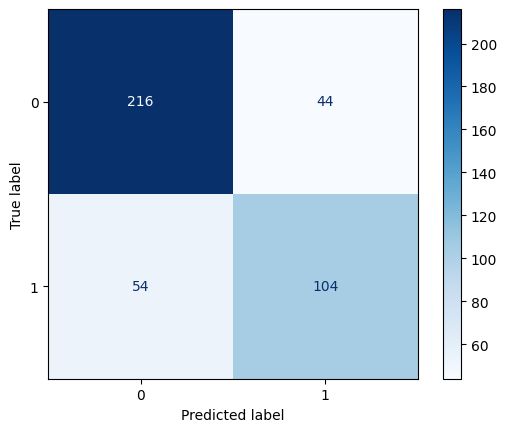

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred)

# Crear una visualización de la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm)

# Graficar la matriz de confusión
disp.plot(cmap=plt.cm.Blues)

plt.show()

# **FNN**
Continuación...

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification
from tensorflow.keras.layers import LSTM

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(
    monitor= 'val_loss',    # Revisamos la función loss de la validación
    patience= 50,            # Numero de épocas que tienen que pasar sin mejora
    restore_best_weights=True  # Guardamos los pesos de la mejor época
)

# Definir la red neuronal secuencial
model_FNN = Sequential([
    # Capa densa (completamente conectada) con 64 neuronas y función de activación ReLU
    # input_dim=X_train.shape[1] establece la dimensión de entrada de acuerdo a las características del conjunto de entrenamiento
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    # Segunda capa densa con 32 neuronas y función de activación ReLU
    Dense(32, activation='relu'),
    # Capa de salida con 1 neurona y función de activación sigmoide para la predicción binaria
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
# optimizer='adam' especifica el optimizador Adam
# loss='binary_crossentropy' especifica la función de pérdida para clasificación binaria
# metrics=['accuracy'] especifica que se rastreará la métrica de precisión durante el entrenamiento y la evaluación
model_FNN.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
# epochs=100 especifica que el entrenamiento se realizará durante 100 épocas
# batch_size=32 especifica que el tamaño del lote será de 32 muestras
# validation_split=0.1 reserva el 10% de los datos de entrenamiento para validación
# verbose=1 habilita la salida detallada del proceso de entrenamiento
history = model_FNN.fit(X_train, y_train, epochs=1000, batch_size=32, validation_split=0.1, verbose=1, callbacks = [early_stopping])

# Evaluar el modelo en el conjunto de validación
# loss, accuracy devuelve la pérdida y precisión del modelo en el conjunto de validación
loss, accuracy = model_FNN.evaluate(X_test, y_test)

# Imprimir la pérdida y precisión del modelo en el conjunto de validación
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6470 - loss: 0.6439 - val_accuracy: 0.8000 - val_loss: 0.5662
Epoch 2/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7579 - loss: 0.5626 - val_accuracy: 0.8000 - val_loss: 0.5187
Epoch 3/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8155 - loss: 0.4981 - val_accuracy: 0.7778 - val_loss: 0.4980
Epoch 4/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8000 - loss: 0.4719 - val_accuracy: 0.7889 - val_loss: 0.4839
Epoch 5/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8239 - loss: 0.4370 - val_accuracy: 0.7889 - val_loss: 0.4753
Epoch 6/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7781 - loss: 0.4956 - val_accuracy: 0.7889 - val_loss: 0.4663
Epoch 7/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8081 - loss: 0.4449 - val_accuracy: 0.7889 - val_loss: 0.4627
Epoch 8/1000
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8137 - loss: 0.4294 - val_accuracy: 0

In [ ]:
# Generar las predicciones usando el modelo de red neuronal entrenado
y_pred_FNN = np.round(model_FNN.predict(X_train)).astype(int)
print('----------------Scores FNN----------------')
print('\nAccuracy -----', accuracy_score(y_train, y_pred_FNN))
print('\nRecall -------', recall_score(y_train, y_pred_FNN))
print('\nPrecision ----', precision_score(y_train, y_pred_FNN))
print('\nF1 Score -----', f1_score(y_train, y_pred_FNN))
y_pred_FNN = np.round(model_FNN.predict(X_test)).astype(int)
print('----------------Scores FNN----------------')
print('\nAccuracy -----', accuracy_score(y_test, y_pred_FNN))
print('\nRecall -------', recall_score(y_test, y_pred_FNN))
print('\nPrecision ----', precision_score(y_test, y_pred_FNN))
print('\nF1 Score -----', f1_score(y_test, y_pred_FNN))
# Generar las predicciones usando el modelo de red neuronal entrenado


28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
----------------Scores FNN----------------

Accuracy ----- 0.8361391694725028

Recall ------- 0.6988304093567251

Precision ---- 0.8475177304964538

F1 Score ----- 0.7660256410256411
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 
----------------Scores FNN----------------

Accuracy ----- 0.7703349282296651

Recall ------- 0.6455696202531646

Precision ---- 0.7183098591549296

F1 Score ----- 0.6799999999999999


In [ ]:
# Crear un DataFrame para almacenar los resultados
result_df_FNN = pd.DataFrame({
    'PassengerId': df_test['ID'],  # 'ID' debe ser la columna del DataFrame df_test que contiene los IDs de los pasajeros
})

# Agregar la columna 'Survived' con las predicciones binarias
result_df_FNN['Survived'] = y_pred_FNN

# Mostrar el DataFrame resultante
result_df_FNN


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
result_df_FNN.to_csv('predicciones_FNN.csv', index=False)

# **LSTM**

In [ ]:

early_stopping = EarlyStopping(
    monitor= 'val_loss',    # Revisamos la función loss de la validación
    patience= 50,            # Numero de épocas que tienen que pasar sin mejora
    restore_best_weights=True  # Guardamos los pesos de la mejor época
)

# Reajustar los datos de entrenamiento y validación para adaptarse a la entrada LSTM
X_train_reshaped = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))
X_test_reshaped = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

# Definir el modelo LSTM secuencial
model_LSTM = Sequential([
    # Primera capa LSTM con 256 unidades, que devuelve secuencias completas (return_sequences=True)
    LSTM(64, input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]), return_sequences=True),
    # Segunda capa LSTM con 128 unidades, que también devuelve secuencias completas
    LSTM(32, return_sequences=False),
    # Capa densa con 32 unidades y función de activación ReLU
    Dense(16, activation='relu'),
    # Capa de salida con 1 unidad y función de activación sigmoide para predicción binaria
    Dense(1, activation='sigmoid')
])

# Compilar el modelo
# optimizer='adam' especifica el optimizador Adam
# loss='binary_crossentropy' especifica la función de pérdida para clasificación binaria
# metrics=['accuracy'] especifica que se rastreará la métrica de precisión durante el entrenamiento y la evaluación
model_LSTM.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Entrenar el modelo
# epochs=100 especifica que el entrenamiento se realizará durante 100 épocas
# batch_size=32 especifica que el tamaño del lote será de 32 muestras
# validation_split=0.1 reserva el 10% de los datos de entrenamiento para validación
# verbose=1 habilita la salida detallada del proceso de entrenamiento
history = model_LSTM.fit(X_train_reshaped, y_train, epochs=100, batch_size=32, validation_split= 0.1, verbose=1,   callbacks=[early_stopping])

# Evaluar el modelo en el conjunto de validación
# loss, accuracy devuelve la pérdida y precisión del modelo en el conjunto de validación
loss, accuracy = model_LSTM.evaluate(X_test_reshaped, y_test)

# Imprimir la pérdida y precisión del modelo en el conjunto de validación
print(f'Test Loss: {loss:.4f}')
print(f'Test Accuracy: {accuracy:.4f}')


Epoch 1/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 4s 25ms/step - accuracy: 0.6073 - loss: 0.6897 - val_accuracy: 0.6222 - val_loss: 0.6747
Epoch 2/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6078 - loss: 0.6703 - val_accuracy: 0.6222 - val_loss: 0.6382
Epoch 3/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6260 - loss: 0.6240 - val_accuracy: 0.6222 - val_loss: 0.5774
Epoch 4/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.6240 - loss: 0.5827 - val_accuracy: 0.7667 - val_loss: 0.5429
Epoch 5/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7429 - loss: 0.5493 - val_accuracy: 0.8000 - val_loss: 0.5347
Epoch 6/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7982 - loss: 0.5229 - val_accuracy: 0.7778 - val_loss: 0.5276
Epoch 7/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8133 - loss: 0.5007 - val_accuracy: 0.7778 - val_loss: 0.5107
Epoch 8/100
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7791 - loss: 0.5161 - val_accuracy: 0.7778 - 

In [ ]:
y_pred_LSTM = np.round(model_LSTM.predict(X_train_reshaped)).astype(int)
print('----------------Scores LSTM----------------')
print('\nAccuracy -----', accuracy_score(y_train, y_pred_LSTM))
print('\nRecall -------', recall_score(y_train, y_pred_LSTM))
print('\nPrecision ----', precision_score(y_train, y_pred_LSTM))
print('\nF1 Score -----', f1_score(y_train, y_pred_LSTM))
y_pred_LSTM = np.round(model_LSTM.predict(X_test_reshaped)).astype(int)
print('----------------Scores LSTM----------------')
print('\nAccuracy -----', accuracy_score(y_test, y_pred_LSTM))
print('\nRecall -------', recall_score(y_test, y_pred_LSTM))
print('\nPrecision ----', precision_score(y_test, y_pred_LSTM))
print('\nF1 Score -----', f1_score(y_test, y_pred_LSTM))


28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step
----------------Scores LSTM----------------

Accuracy ----- 0.8103254769921436

Recall ------- 0.6023391812865497

Precision ---- 0.8619246861924686

F1 Score ----- 0.7091222030981068
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
----------------Scores LSTM----------------

Accuracy ----- 0.7822966507177034

Recall ------- 0.5632911392405063

Precision ---- 0.8018018018018018

F1 Score ----- 0.6617100371747211


In [ ]:
# # Crear un DataFrame con las predicciones generadas por el modelo LSTM
result_df_LSTM = pd.DataFrame({
    'PassengerId': df_test['ID'],
})
result_df_LSTM['Survived'] = y_pred_LSTM
result_df_LSTM

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [ ]:
# Guardar el DataFrame result_df_LSTM en un archivo CSV
result_df_LSTM.to_csv('predicciones_LSTM.csv', index=False)

# **XGBOOST & OPTUNA**


In [ ]:
!pip install optuna catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 5.9 MB/s eta 0:00:00


In [ ]:
import xgboost as xgb
import optuna
from catboost import CatBoostClassifier, Pool

In [ ]:
X_train_2, X_valid, y_train_2, y_valid = train_test_split(X_train, y_train, test_size=0.1, random_state=42)

In [ ]:
def objective(trial):
    params = {
        'objective': 'binary:logistic',
        'eval_metric': 'logloss',
        'verbosity': 0,
        'booster': trial.suggest_categorical('booster', ['gbtree', 'gblinear', 'dart']),
        'lambda': trial.suggest_float('lambda', 1e-8, 1.0, log=True),
        'alpha': trial.suggest_float('alpha', 1e-8, 1.0, log=True),
        'eta': trial.suggest_float('eta', 1e-8, 1.0, log=True),
        'max_depth': trial.suggest_int('max_depth', 1, 9),
        'min_child_weight': trial.suggest_float('min_child_weight', 1e-8, 1.0, log=True),
        'subsample': trial.suggest_float('subsample', 0.1, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.1, 1.0),
    }
    dtrain = xgb.DMatrix(X_train_2, label=y_train_2)
    dvalid = xgb.DMatrix(X_valid, label=y_valid)
    model = xgb.train(params, dtrain, evals=[(dvalid, 'eval')], early_stopping_rounds=10, verbose_eval=False)

    # Make predictions
    preds = model.predict(dvalid)
    pred_labels = [1 if p > 0.5 else 0 for p in preds]

    # Evaluate the model
    accuracy = accuracy_score(y_valid, pred_labels)

    return 1 - accuracy

In [ ]:
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=1000)

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

[I 2024-09-10 11:39:38,298] A new study created in memory with name: no-name-ef69e8b4-28ba-445b-9563-f9c0abdef05d
[I 2024-09-10 11:39:38,402] Trial 0 finished with value: 0.4 and parameters: {'booster': 'gbtree', 'lambda': 2.8771658203511602e-06, 'alpha': 4.458199468414463e-05, 'eta': 0.0029156459472462824, 'max_depth': 5, 'min_child_weight': 0.968815110650891, 'subsample': 0.9217865900263384, 'colsample_bytree': 0.15511187695306622}. Best is trial 0 with value: 0.4.
[I 2024-09-10 11:39:38,423] Trial 1 finished with value: 0.4 and parameters: {'booster': 'gblinear', 'lambda': 0.9267699060051093, 'alpha': 0.0032849509548513287, 'eta': 0.0017248684761365244, 'max_depth': 9, 'min_child_weight': 0.0001391300468216767, 'subsample': 0.18832738160003237, 'colsample_bytree': 0.6600443983390217}. Best is trial 0 with value: 0.4.
[I 2024-09-10 11:39:38,441] Trial 2 finished with value: 0.4 and parameters: {'booster': 'gblinear', 'lambda': 3.875226434991568e-08, 'alpha': 0.0002832615500292867, 'e

Best trial:
  Value: 0.12222222222222223
  Params: 
    booster: dart
    lambda: 0.0004581127418227739
    alpha: 5.24490999621088e-06
    eta: 0.35537349690165704
    max_depth: 4
    min_child_weight: 4.250759375442321e-08
    subsample: 0.8863180876428565
    colsample_bytree: 0.846526019026377


In [ ]:
best_params = trial.params
model_xgb = xgb.XGBClassifier(**best_params)
model_xgb.fit(X_train, y_train)

XGBClassifier(alpha=5.24490999621088e-06, base_score=None, booster='dart',
              callbacks=None, colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.846526019026377, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eta=0.35537349690165704, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, lambda=0.0004581127418227739,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=4.250759375442321e-08,
              missing=nan, monotone_constraints=None, multi_strategy=None,
              n_estimators=None, ...)

In [ ]:
y_pred_xgb = np.round(model_xgb.predict(X_train)).astype(int)
print('----------------Scores XGB----------------')
print('\nAccuracy -----', accuracy_score(y_train, y_pred_xgb))
print('\nRecall -------', recall_score(y_train, y_pred_xgb))
print('\nPrecision ----', precision_score(y_train, y_pred_xgb))
print('\nF1 Score -----', f1_score(y_train, y_pred_xgb))

y_pred_xgb = np.round(model_xgb.predict(X_test)).astype(int)
print('----------------Scores XGB----------------')
print('\nAccuracy -----', accuracy_score(y_test, y_pred_xgb))
print('\nRecall -------', recall_score(y_test, y_pred_xgb))
print('\nPrecision ----', precision_score(y_test, y_pred_xgb))
print('\nF1 Score -----', f1_score(y_test, y_pred_xgb))

----------------Scores XGB----------------

Accuracy ----- 0.9124579124579124

Recall ------- 0.8362573099415205

Precision ---- 0.9285714285714286

F1 Score ----- 0.88
----------------Scores XGB----------------

Accuracy ----- 0.7105263157894737

Recall ------- 0.5949367088607594

Precision ---- 0.6225165562913907

F1 Score ----- 0.6084142394822006


# **LSTM con Optuna**


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import optuna
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import accuracy_score

In [ ]:

# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)
# Create data loaders
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [ ]:
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=dropout)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        c0 = torch.zeros(self.lstm.num_layers, x.size(0), self.lstm.hidden_size).to(x.device)
        out, _ = self.lstm(x, (h0, c0))
        out = self.fc(out[:, -1, :])
        return out


In [ ]:
def objective(trial):
    # Define the hyperparameters for the LSTM model
    params = {
        'hidden_size': trial.suggest_int('hidden_size', 32, 128),
        'num_layers': trial.suggest_int('num_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    }

    if params['num_layers'] == 1:
        params['dropout'] = 0.0

    # Define the LSTM model
    model = LSTMModel(input_size=X_train_tensor.shape[1],
                      hidden_size=params['hidden_size'],
                      num_layers=params['num_layers'],
                      output_size=2,
                      dropout=params['dropout'])

    # Define the loss function and optimizer
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

    # Train the model
    model.train()
    for epoch in range(10):  # Training for 10 epochs
        y_train_pred = []
        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs.unsqueeze(1))  # Add dimension for LSTM input
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            # Collect training predictions
            _, predicted_train = torch.max(outputs, 1)
            y_train_pred.extend(predicted_train.cpu().numpy())

    # Evaluate the model on the test data
    model.eval()
    y_test_pred = []
    with torch.no_grad():
        for inputs, _ in test_loader:
            outputs = model(inputs.unsqueeze(1))  # Add dimension for LSTM input
            _, predicted = torch.max(outputs, 1)
            y_test_pred.extend(predicted.cpu().numpy())

    # Calculate test accuracy
    accuracy = accuracy_score(y_test, y_test_pred)

    return 1 - accuracy

# Create a study object
study = optuna.create_study(direction='minimize')

# Optimize the study
study.optimize(objective, n_trials=250)

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Train the model with the best hyperparameters
best_params = trial.params
model_lstm = LSTMModel(input_size=X_train_tensor.shape[1],
                       hidden_size=best_params['hidden_size'],
                       num_layers=best_params['num_layers'],
                       output_size=2,
                       dropout=best_params['dropout'])

# Define the loss function and optimizer with best hyperparameters
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_lstm.parameters(), lr=best_params['learning_rate'])

# Fit the final model
model_lstm.train()
for epoch in range(10):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model_lstm(inputs.unsqueeze(1))
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluate on training data
y_pred_lstm_train = []
model_lstm.eval()
with torch.no_grad():
    for inputs, _ in train_loader:
        outputs = model_lstm(inputs.unsqueeze(1))
        _, predicted = torch.max(outputs, 1)
        y_pred_lstm_train.extend(predicted.cpu().numpy())

print('----------------Scores LSTM----------------')
print('\nAccuracy -----', accuracy_score(y_train, y_pred_lstm_train))
print('\nRecall -------', recall_score(y_train, y_pred_lstm_train))
print('\nPrecision ----', precision_score(y_train, y_pred_lstm_train))
print('\nF1 Score -----', f1_score(y_train, y_pred_lstm_train))

# Evaluate on test data
y_pred_lstm_test = []
with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = model_lstm(inputs.unsqueeze(1))
        _, predicted = torch.max(outputs, 1)
        y_pred_lstm_test.extend(predicted.cpu().numpy())

print('----------------Scores LSTM----------------')
print('\nAccuracy -----', accuracy_score(y_test, y_pred_lstm_test))
print('\nRecall -------', recall_score(y_test, y_pred_lstm_test))
print('\nPrecision ----', precision_score(y_test, y_pred_lstm_test))
print('\nF1 Score -----', f1_score(y_test, y_pred_lstm_test))


[I 2024-09-10 11:42:01,281] A new study created in memory with name: no-name-7caaad40-1423-4d7a-a1d5-9df2beb750c4
[I 2024-09-10 11:42:06,054] Trial 0 finished with value: 0.37799043062200954 and parameters: {'hidden_size': 75, 'num_layers': 3, 'dropout': 0.414836565036991, 'learning_rate': 0.00021743457145007922}. Best is trial 0 with value: 0.37799043062200954.
[I 2024-09-10 11:42:08,886] Trial 1 finished with value: 0.22488038277511957 and parameters: {'hidden_size': 64, 'num_layers': 3, 'dropout': 0.2567668955484894, 'learning_rate': 0.009923862597126716}. Best is trial 1 with value: 0.22488038277511957.
[I 2024-09-10 11:42:10,866] Trial 2 finished with value: 0.23444976076555024 and parameters: {'hidden_size': 102, 'num_layers': 2, 'dropout': 0.22375295088770036, 'learning_rate': 0.005500747188303839}. Best is trial 1 with value: 0.22488038277511957.
[I 2024-09-10 11:42:15,262] Trial 3 finished with value: 0.23684210526315785 and parameters: {'hidden_size': 117, 'num_layers': 3, 'd

Best trial:
  Value: 0.215311004784689
  Params: 
    hidden_size: 61
    num_layers: 3
    dropout: 0.27927614564780934
    learning_rate: 0.004932102844410399
----------------Scores LSTM----------------

Accuracy ----- 0.5600448933782267

Recall ------- 0.2134502923976608

Precision ---- 0.37244897959183676

F1 Score ----- 0.2713754646840149
----------------Scores LSTM----------------

Accuracy ----- 0.7799043062200957

Recall ------- 0.47468354430379744

Precision ---- 0.8928571428571429

F1 Score ----- 0.6198347107438017


# **FNN con Optuna**

In [ ]:
class FNNModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size, dropout):
        super(FNNModel, self).__init__()
        layers = []
        layers.append(nn.Linear(input_size, hidden_size))
        layers.append(nn.ReLU())
        for _ in range(num_layers - 1):
            layers.append(nn.Linear(hidden_size, hidden_size))
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout))
        layers.append(nn.Linear(hidden_size, output_size))
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)


In [ ]:
def objective(trial):
    # Definir los hiperparámetros para el modelo FNN
    params = {
        'hidden_size': trial.suggest_int('hidden_size', 32, 128),
        'num_layers': trial.suggest_int('num_layers', 1, 3),
        'dropout': trial.suggest_float('dropout', 0.0, 0.5),
        'learning_rate': trial.suggest_float('learning_rate', 1e-4, 1e-2, log=True)
    }

    # Definir el modelo FNN
    model = FNNModel(input_size=X_train_tensor.shape[1],
                     hidden_size=params['hidden_size'],
                     num_layers=params['num_layers'],
                     output_size=2,
                     dropout=params['dropout'])

    # Definir la función de pérdida y el optimizador
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=params['learning_rate'])

    # Entrenar el modelo
    model.train()
    for epoch in range(100):  # Entrenar por 250 épocas
        y_train_pred = []  # Reiniciar predicciones para cada época
        y_train_actual = []  # Recoger las etiquetas reales de cada lote

        for inputs, targets in train_loader:
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            loss.backward()
            optimizer.step()

            # Recoger predicciones y etiquetas reales para los datos de entrenamiento en este lote
            _, predicted_train = torch.max(outputs, 1)
            y_train_pred.extend(predicted_train.cpu().numpy())
            y_train_actual.extend(targets.cpu().numpy())  # Recoger etiquetas reales

    # Evaluar el modelo en datos de prueba
    model.eval()
    y_test_pred = []  # Recoger predicciones de prueba
    with torch.no_grad():
        for inputs, _ in test_loader:
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)
            y_test_pred.extend(predicted.cpu().numpy())

    # Calcular la precisión en ambos conjuntos de entrenamiento y prueba
    train_accuracy = accuracy_score(y_train_actual, y_train_pred)  # Comparar con las etiquetas reales de entrenamiento
    test_accuracy = accuracy_score(y_test, y_test_pred)  # Comparar con las etiquetas de prueba

    return 1 - test_accuracy

# Crear un objeto de estudio
study = optuna.create_study(direction='minimize')

# Optimizar el estudio
study.optimize(objective, n_trials=100)

print("Best trial:")
trial = study.best_trial
print("  Value: {}".format(trial.value))
print("  Params: ")
for key, value in trial.params.items():
    print("    {}: {}".format(key, value))

# Entrenar el modelo con los mejores hiperparámetros
best_params = trial.params
model_fnn = FNNModel(input_size=X_train_tensor.shape[1],
                     hidden_size=best_params['hidden_size'],
                     num_layers=best_params['num_layers'],
                     output_size=2,
                     dropout=best_params['dropout'])

# Definir la función de pérdida y el optimizador con los mejores hiperparámetros
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model_fnn.parameters(), lr=best_params['learning_rate'])

# Entrenar el modelo final
model_fnn.train()
for epoch in range(10):
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model_fnn(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

# Evaluar en los datos de entrenamiento
y_pred_fnn_train = []
model_fnn.eval()
with torch.no_grad():
    for inputs, _ in train_loader:
        outputs = model_fnn(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred_fnn_train.extend(predicted.cpu().numpy())

print('----------------Scores FNN----------------')
print('\nAccuracy -----', accuracy_score(y_train, y_pred_fnn_train))
print('\nRecall -------', recall_score(y_train, y_pred_fnn_train))
print('\nPrecision ----', precision_score(y_train, y_pred_fnn_train))
print('\nF1 Score -----', f1_score(y_train, y_pred_fnn_train))

# Evaluar en los datos de prueba
y_pred_fnn_test = []
with torch.no_grad():
    for inputs, _ in test_loader:
        outputs = model_fnn(inputs)
        _, predicted = torch.max(outputs, 1)
        y_pred_fnn_test.extend(predicted.cpu().numpy())

print('----------------Scores FNN----------------')
print('\nAccuracy -----', accuracy_score(y_test, y_pred_fnn_test))
print('\nRecall -------', recall_score(y_test, y_pred_fnn_test))
print('\nPrecision ----', precision_score(y_test, y_pred_fnn_test))
print('\nF1 Score -----', f1_score(y_test, y_pred_fnn_test))


[I 2024-09-10 11:50:47,813] A new study created in memory with name: no-name-85ad5fc0-a2c3-49b4-9818-b2db4ff331ba
[I 2024-09-10 11:50:54,425] Trial 0 finished with value: 0.22009569377990434 and parameters: {'hidden_size': 74, 'num_layers': 2, 'dropout': 0.05382430404971267, 'learning_rate': 0.0015387095843807047}. Best is trial 0 with value: 0.22009569377990434.
[I 2024-09-10 11:51:04,413] Trial 1 finished with value: 0.22248803827751196 and parameters: {'hidden_size': 101, 'num_layers': 3, 'dropout': 0.18926467924124946, 'learning_rate': 0.006471310037908731}. Best is trial 0 with value: 0.22009569377990434.
[I 2024-09-10 11:51:09,296] Trial 2 finished with value: 0.2272727272727273 and parameters: {'hidden_size': 127, 'num_layers': 1, 'dropout': 0.05947517367892624, 'learning_rate': 0.0003198000205066394}. Best is trial 0 with value: 0.22009569377990434.
[I 2024-09-10 11:51:16,694] Trial 3 finished with value: 0.23205741626794263 and parameters: {'hidden_size': 63, 'num_layers': 2, 

Best trial:
  Value: 0.215311004784689
  Params: 
    hidden_size: 122
    num_layers: 3
    dropout: 0.40272899792383976
    learning_rate: 0.006091797555025239
----------------Scores FNN----------------

Accuracy ----- 0.5454545454545454

Recall ------- 0.23976608187134502

Precision ---- 0.36123348017621143

F1 Score ----- 0.28822495606326887
----------------Scores FNN----------------

Accuracy ----- 0.7703349282296651

Recall ------- 0.5189873417721519

Precision ---- 0.803921568627451

F1 Score ----- 0.6307692307692309
